In [51]:
pip install keras==2.14.0

  Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
Note: you may need to restart the kernel to use updated packages.


In [52]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
#from keras.optimizers import gradient_descent_v2 
import math
from sklearn.metrics import mean_squared_error

In [53]:
stockList = ["INTC", "PFE", "CMCSA", "SAP", "TMUS", "TMO", "AMD", "NVS", "LIN", "MCD", "NFLX", "AZN", "ACN", "CRM", "BABA", "FMX", "CSCO", "SHEL", "BAC", "PEP", "ABBV", "KO", "TM", "COST", "MRK", "ASML", "CVX", "ADBE", "HD", "ORCL", "JNJ", "PG", "MA", "AVGO", "XOM", "JPM", "WMT", "NVO", "UNH", "TSM", "V", "LLY", "TSLA", "BRK-B", "META", "NVDA", "AMZN", "GOOGL", "MSFT", "AAPL"]

In [54]:
"""
import yfinance as yf
for i in stockList:
    yf.download(i, period="7y", interval="1d").to_csv("./data/"+i+".csv", encoding='utf-8')
    print(i+" is downloaded")
"""

'\nimport yfinance as yf\nfor i in stockList:\n    yf.download(i, period="7y", interval="1d").to_csv("./data/"+i+".csv", encoding=\'utf-8\')\n    print(i+" is downloaded")\n'

In [55]:
df_ = {}
for i in stockList:
    df_[i] = pd.read_csv("Data/"+i+".csv", index_col="Date", parse_dates=["Date"])

In [56]:
def split(dataframe, border, col):
    return dataframe.loc[:border,col], dataframe.loc[border:,col]

df_new = {}
for i in stockList:
    df_new[i] = {}
    df_new[i]["Train"], df_new[i]["Test"] = split(df_[i], "2022-01-01", "Close")
    if i == "AAPL":
        print(df_new[i]["Train"])
        print(df_new[i]["Test"])

Date
2016-11-11     27.107500
2016-11-14     26.427500
2016-11-15     26.777500
2016-11-16     27.497499
2016-11-17     27.487499
                 ...    
2021-12-27    180.330002
2021-12-28    179.289993
2021-12-29    179.380005
2021-12-30    178.199997
2021-12-31    177.570007
Name: Close, Length: 1293, dtype: float64
Date
2022-01-03    182.009995
2022-01-04    179.699997
2022-01-05    174.919998
2022-01-06    172.000000
2022-01-07    172.169998
                 ...    
2023-11-06    179.229996
2023-11-07    181.820007
2023-11-08    182.889999
2023-11-09    182.410004
2023-11-10    186.399994
Name: Close, Length: 468, dtype: float64


In [57]:
for i in stockList:
    if i == "AAPL":
        fuck = np.array(df_new[i]["Train"])
        print(fuck)

[ 27.10750008  26.42749977  26.77750015 ... 179.38000488 178.19999695
 177.57000732]


/var/folders/tt/rynv9sfx6hd7zsm3w8y6qv8c0000gn/T/ipykernel_7019/1101381474.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,4))


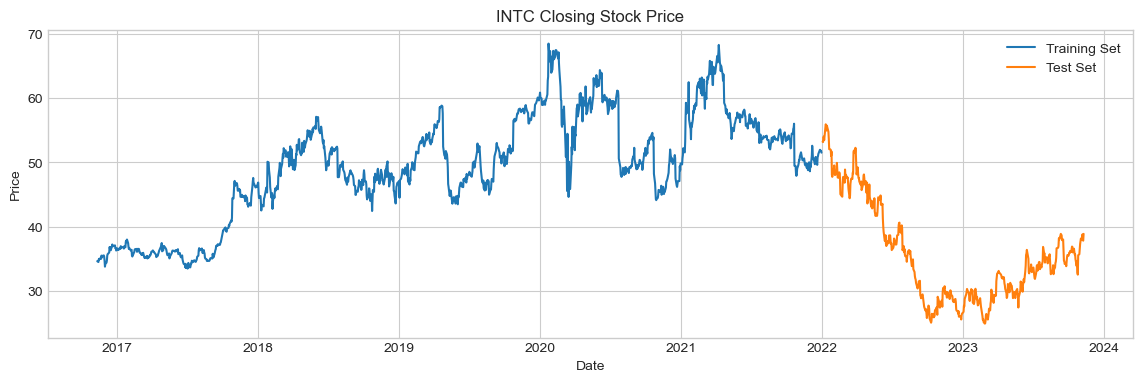

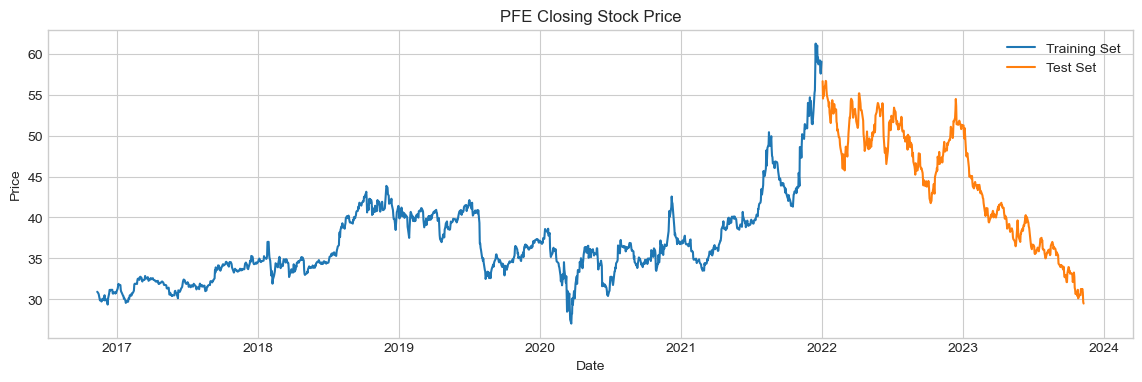

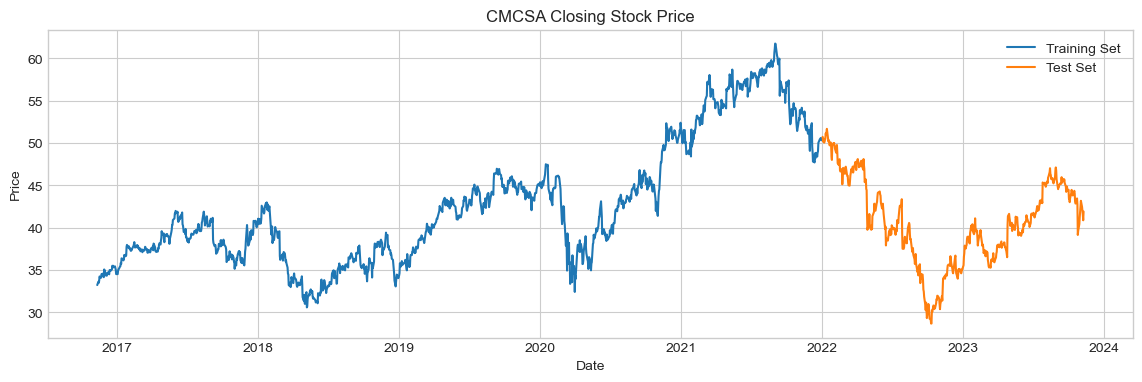

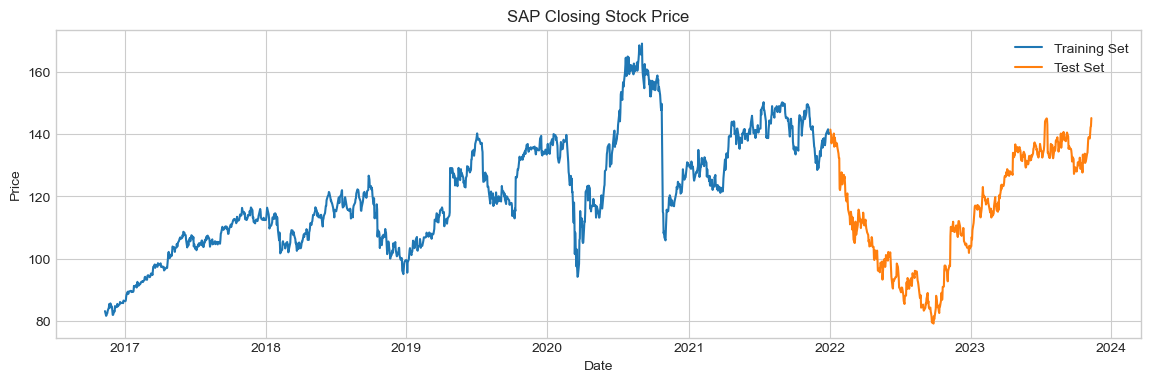

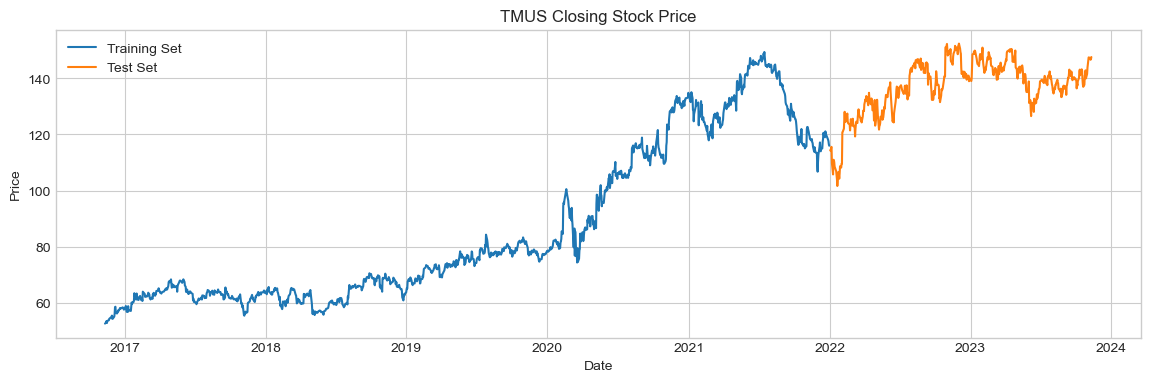

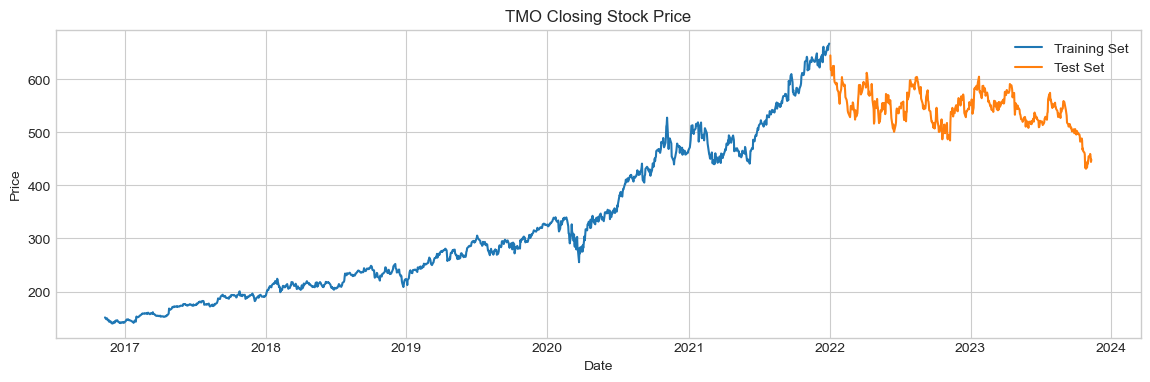

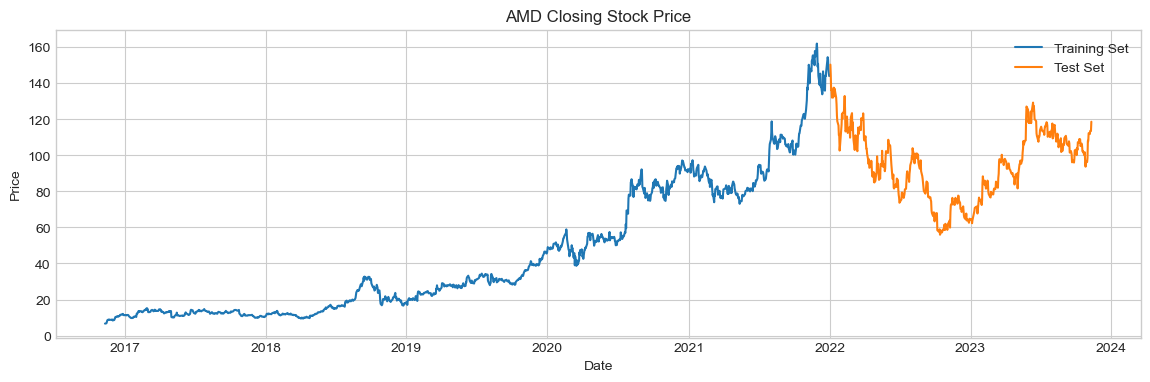

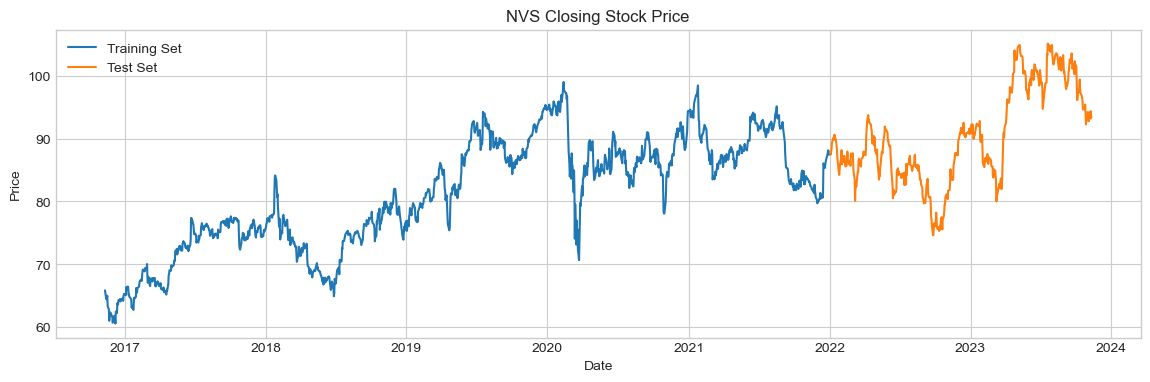

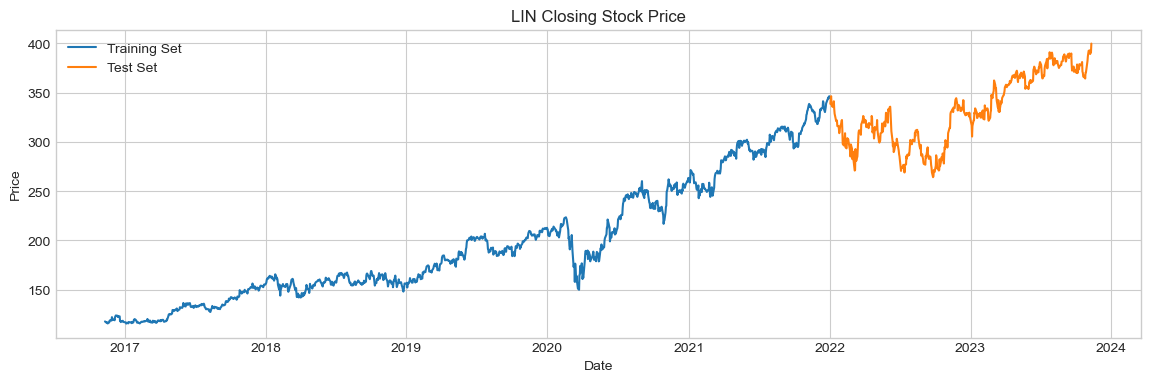

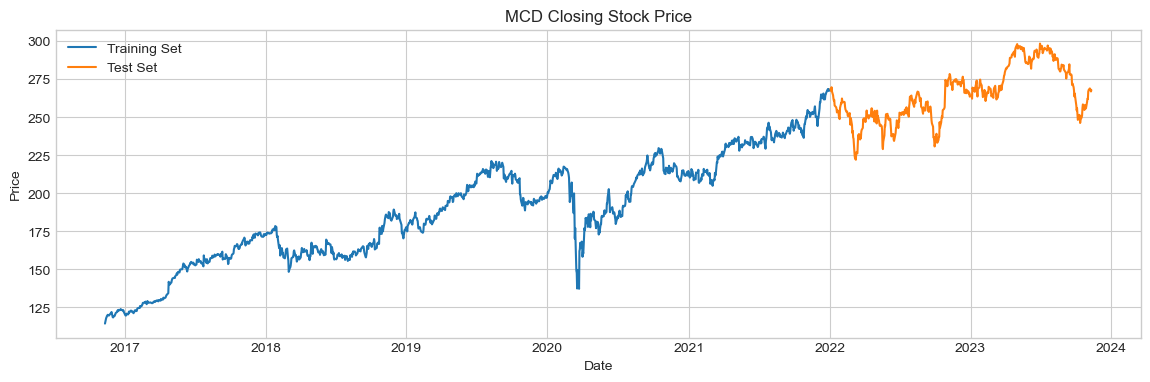

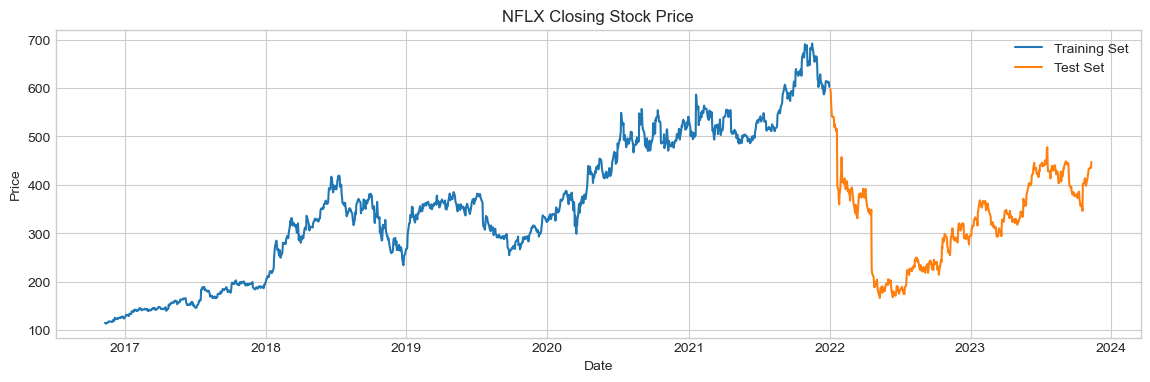

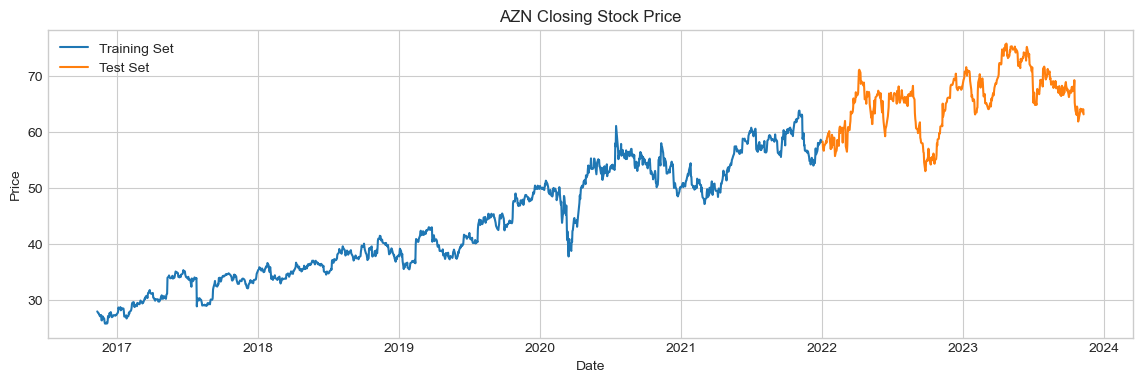

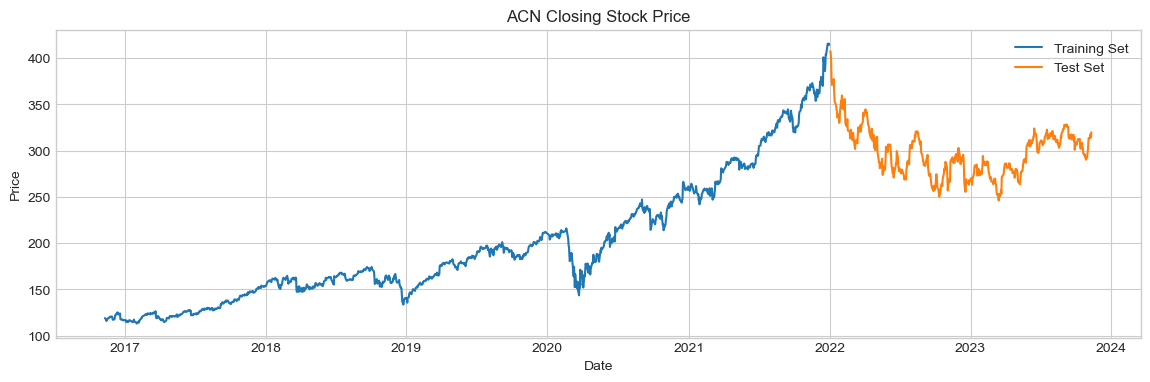

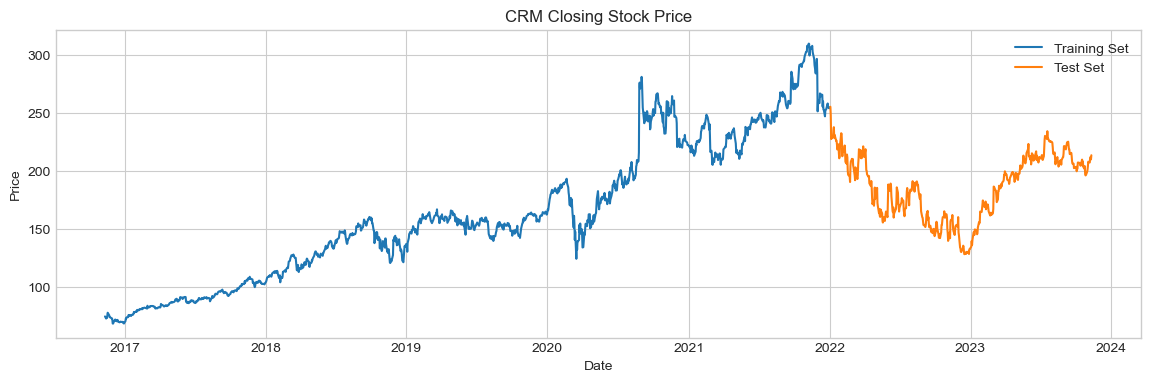

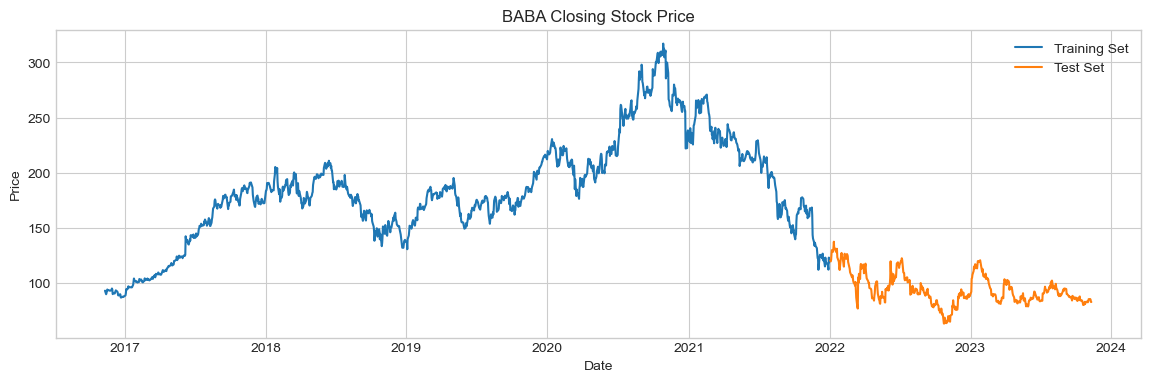

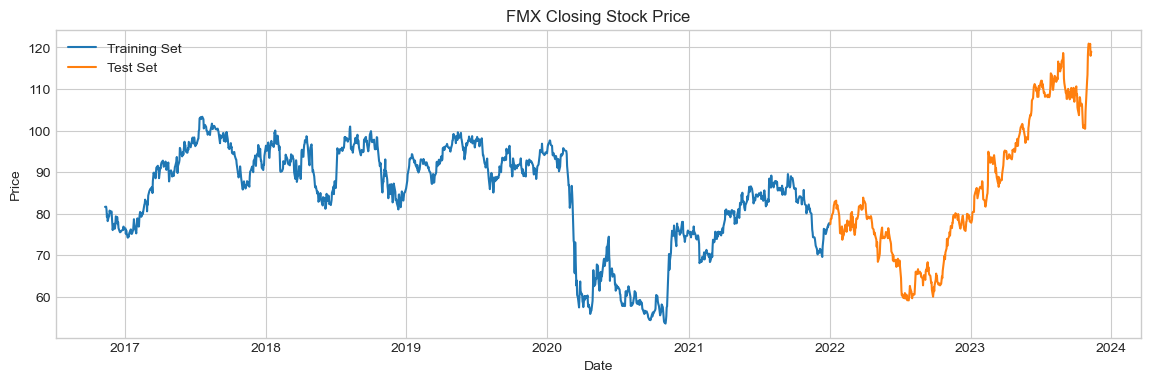

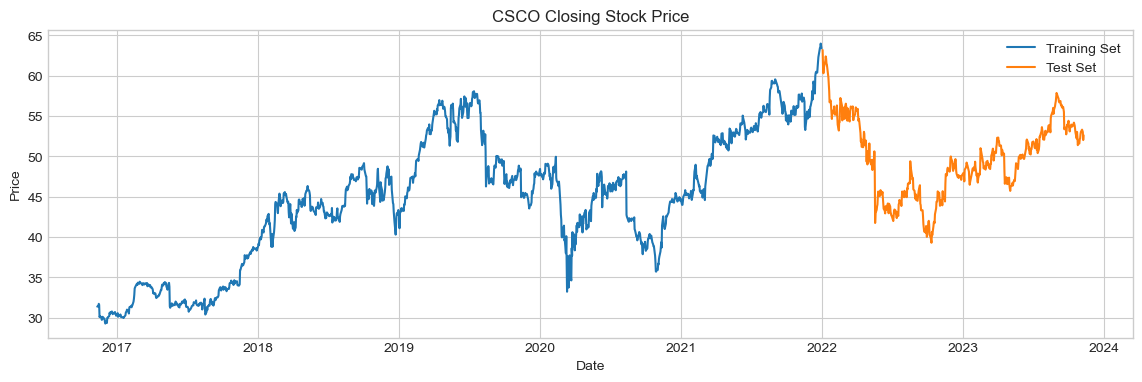

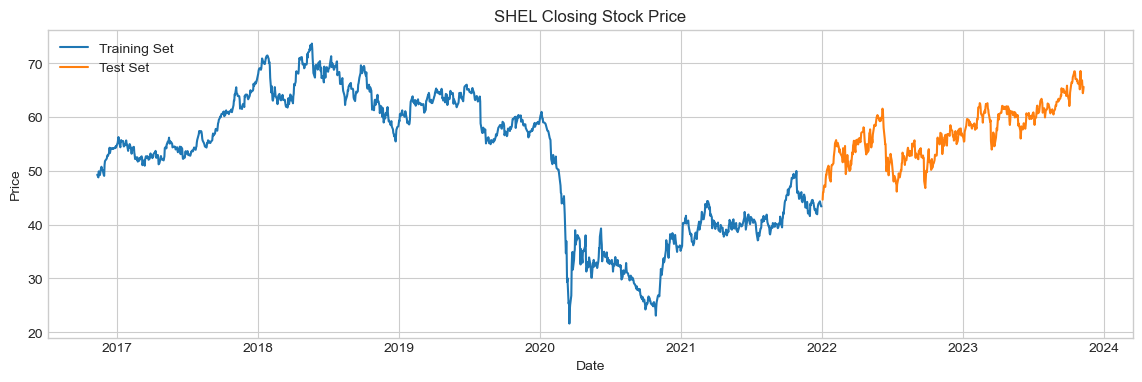

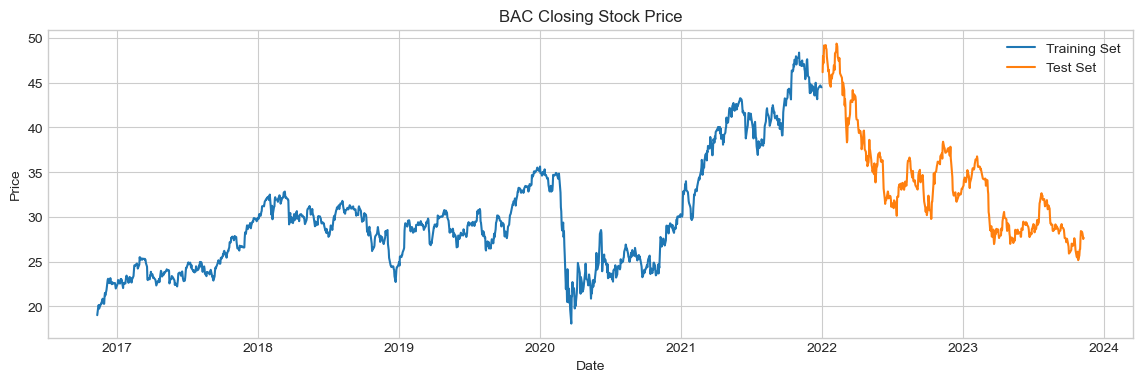

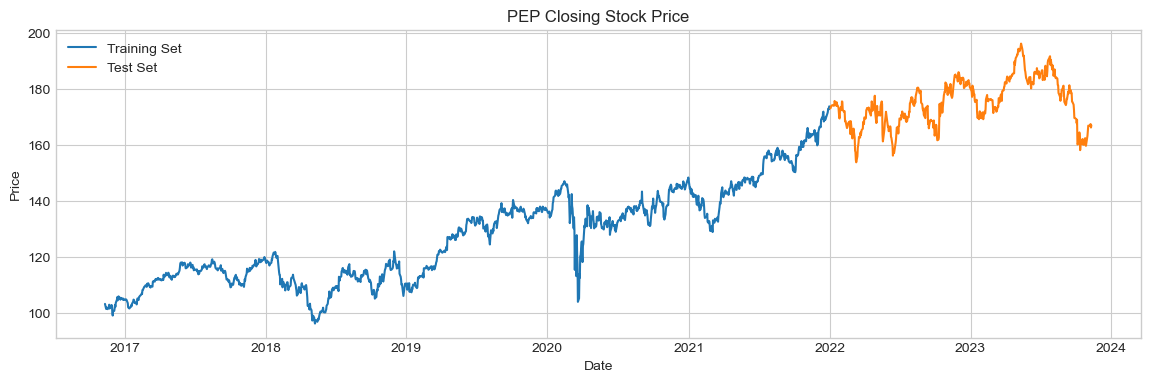

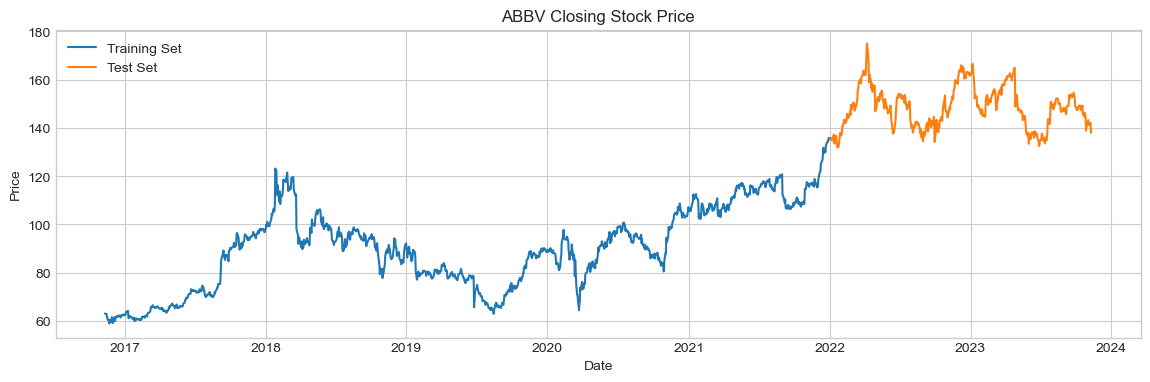

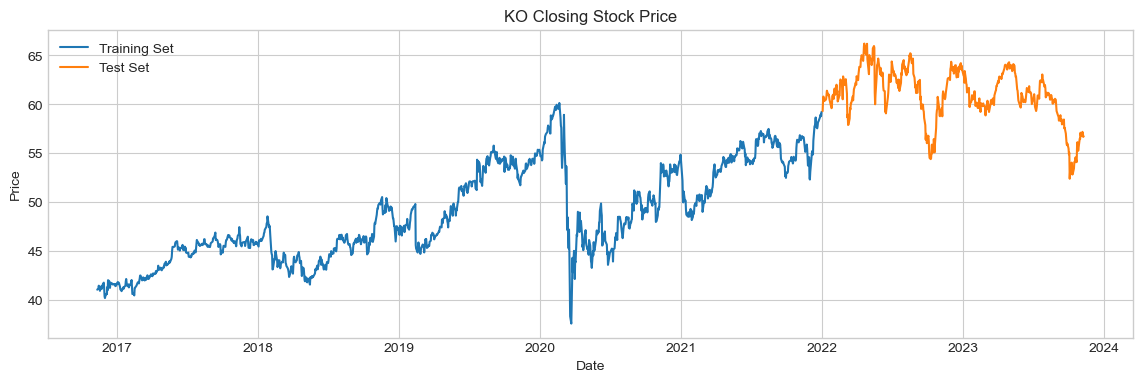

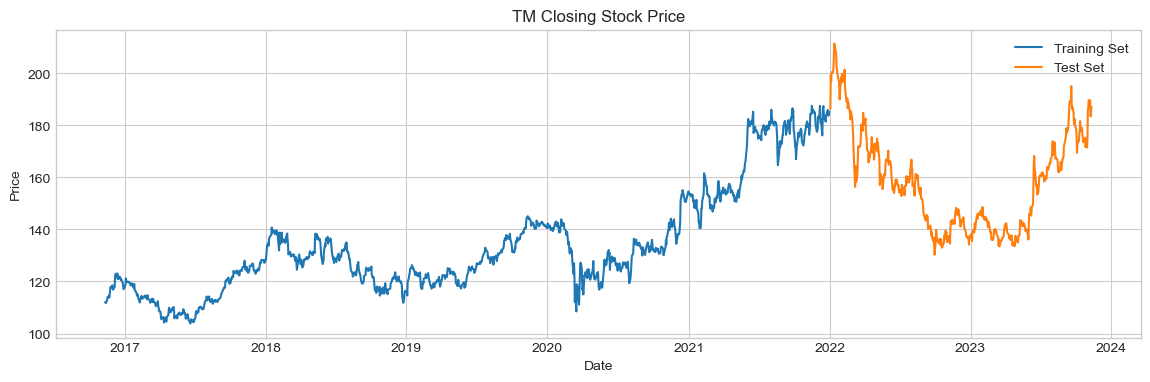

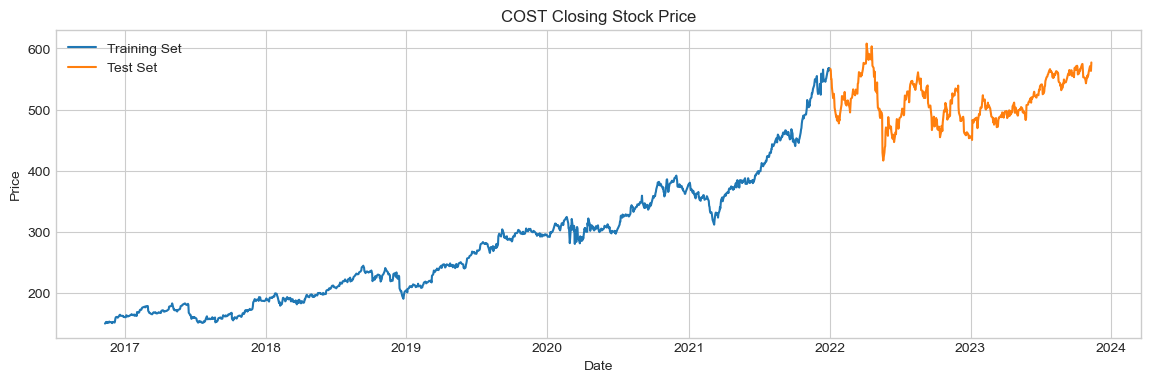

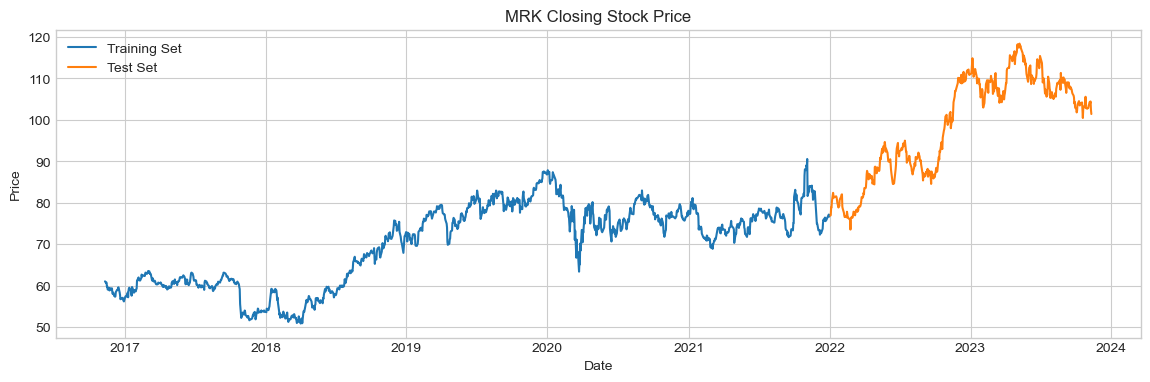

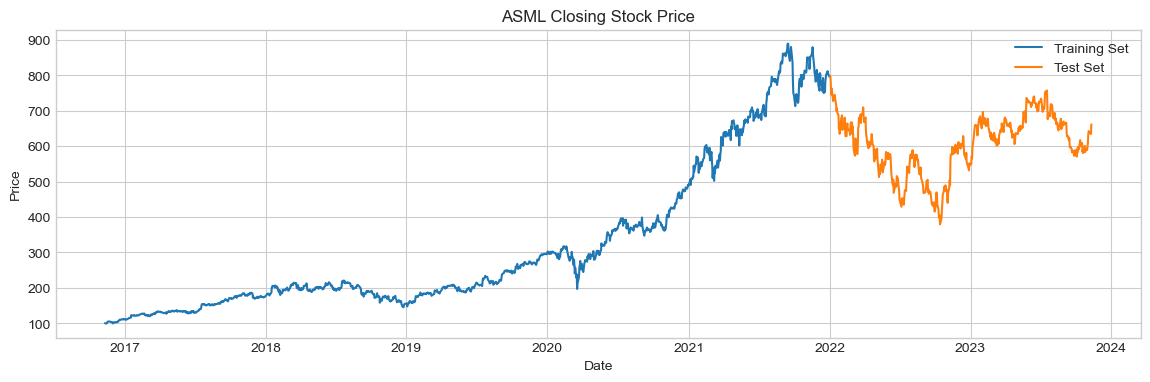

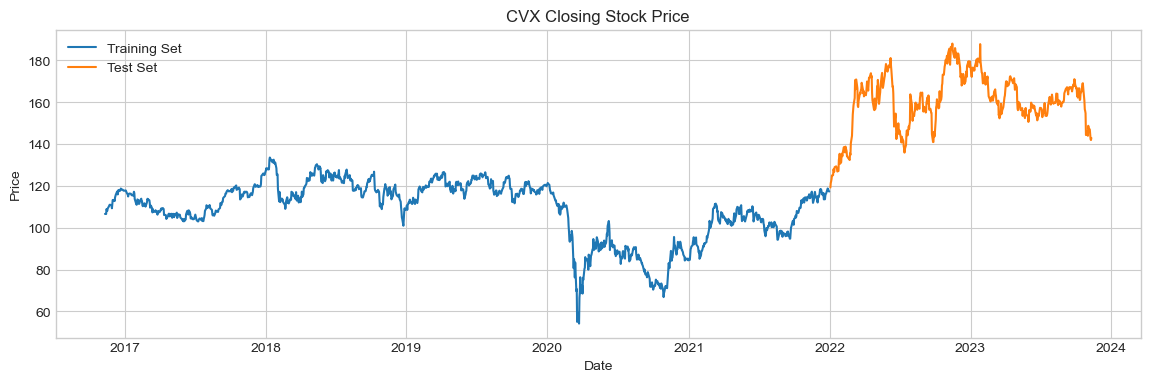

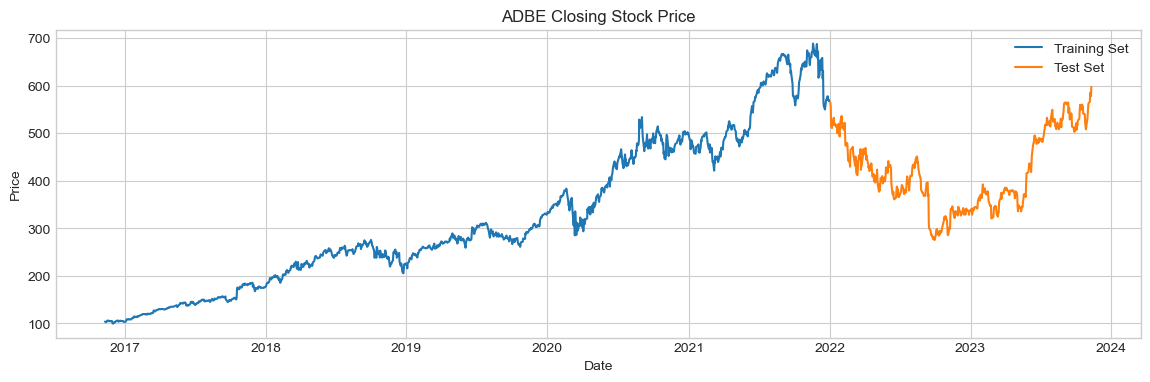

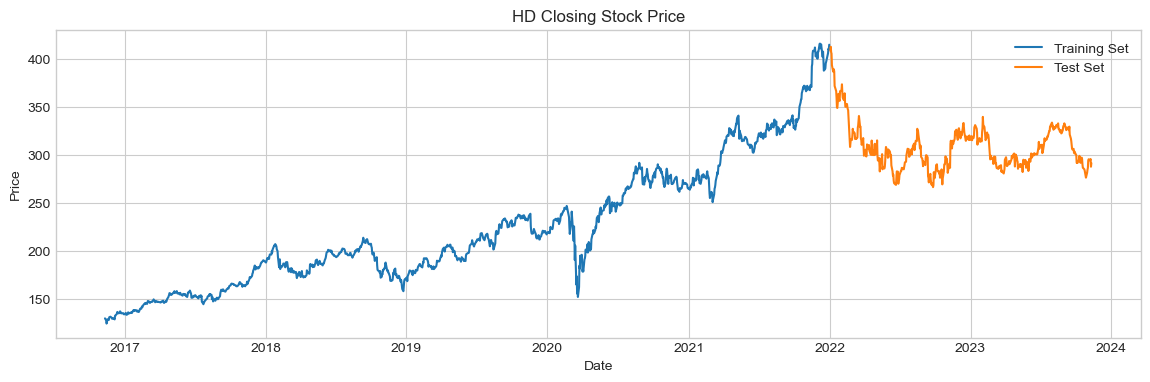

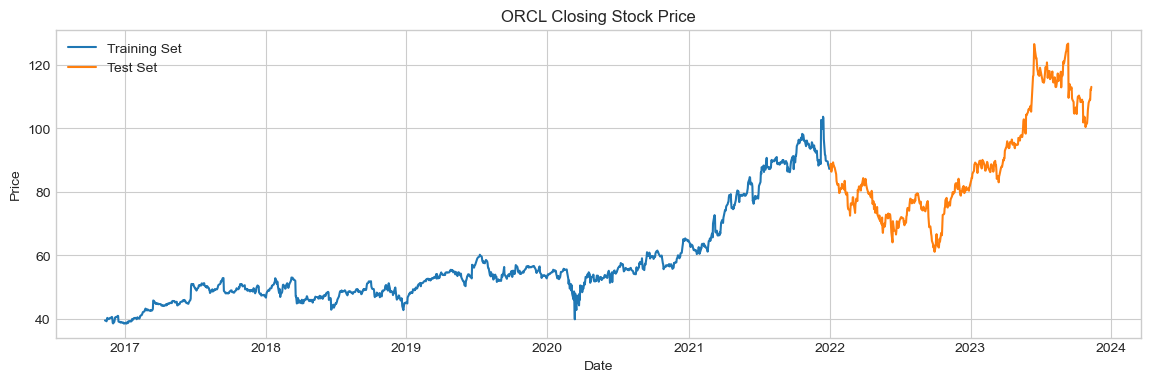

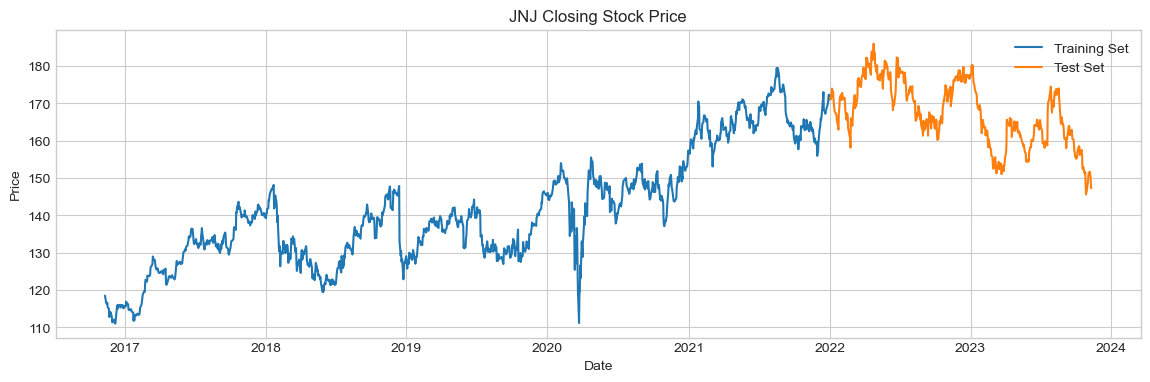

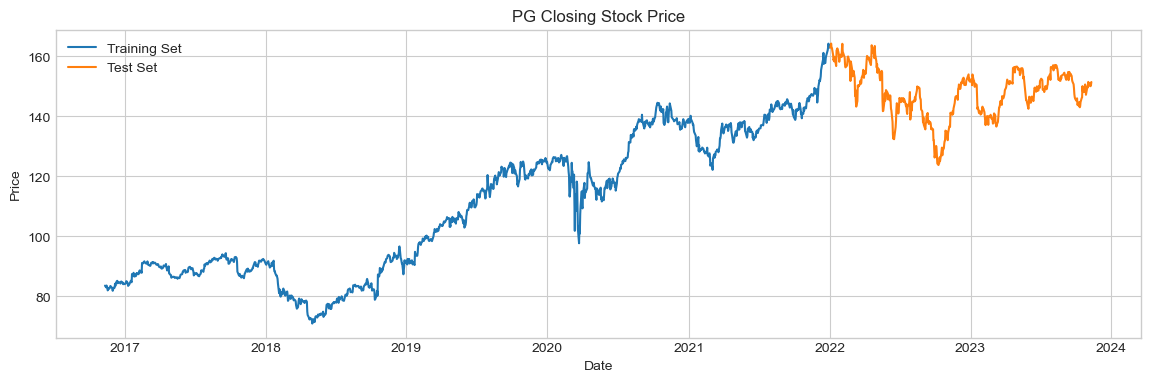

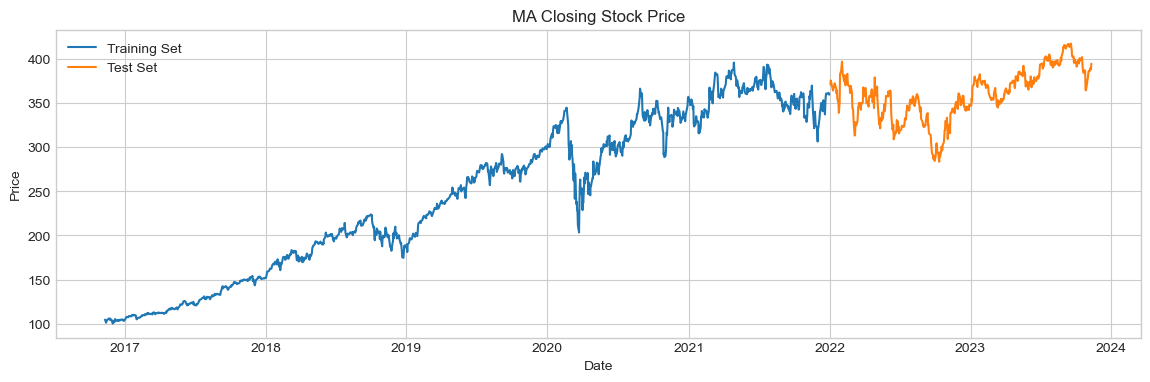

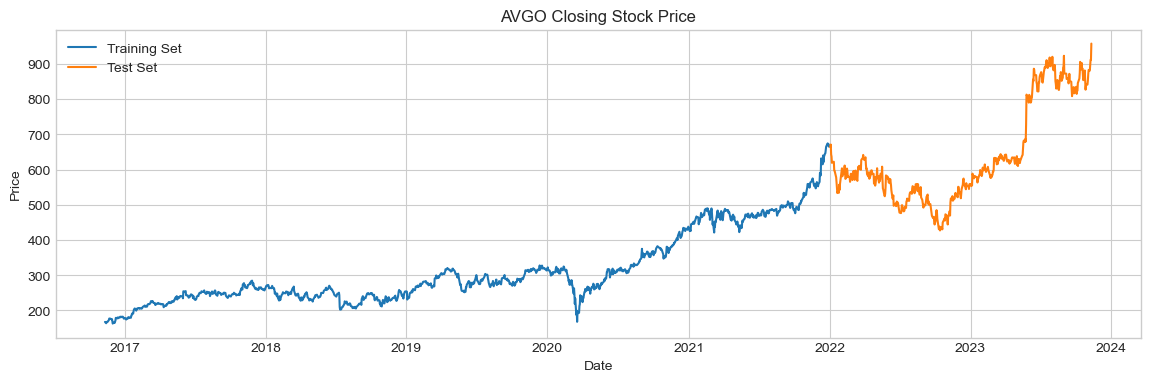

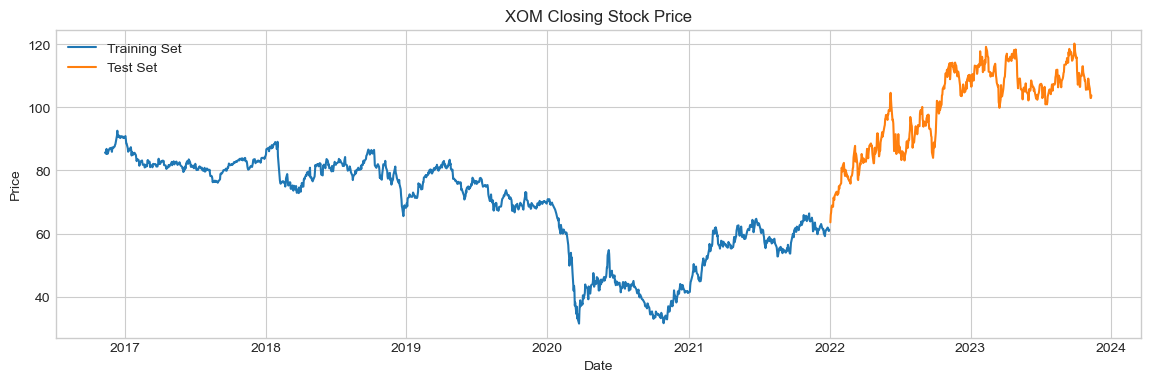

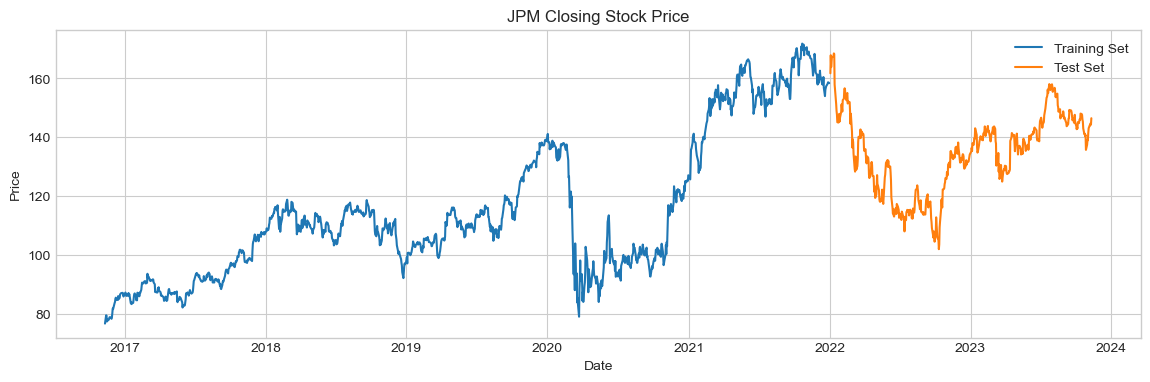

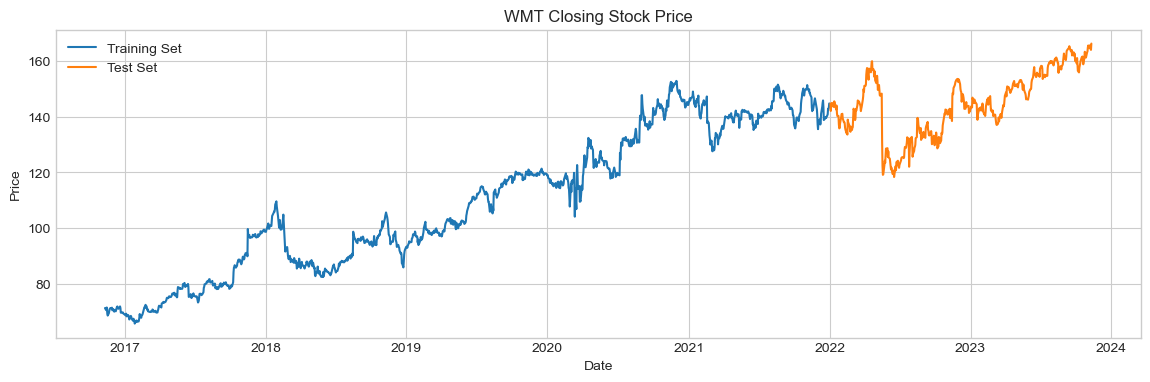

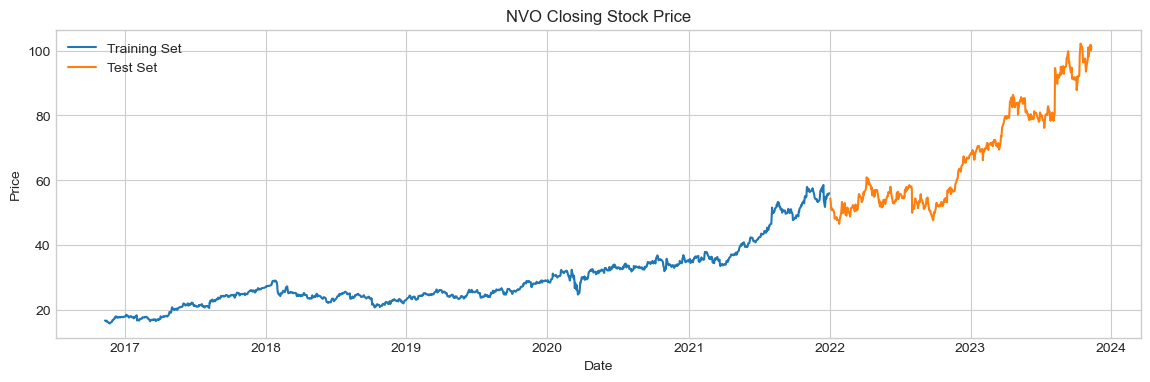

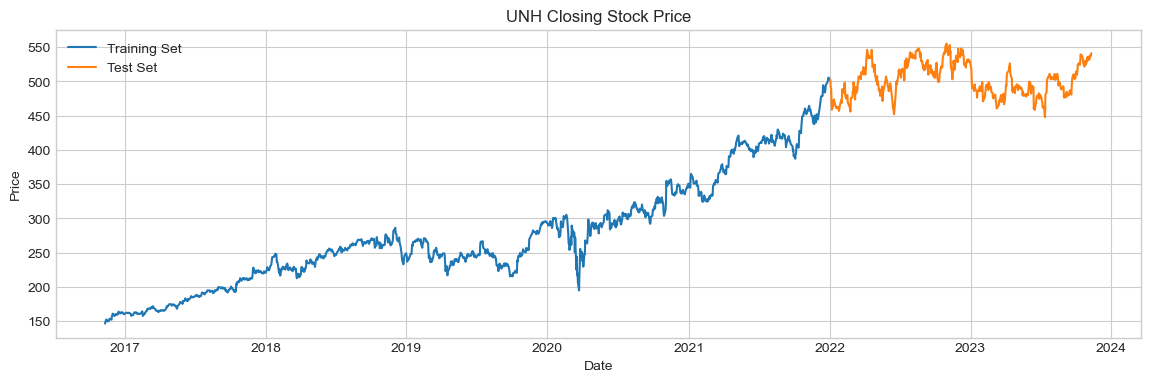

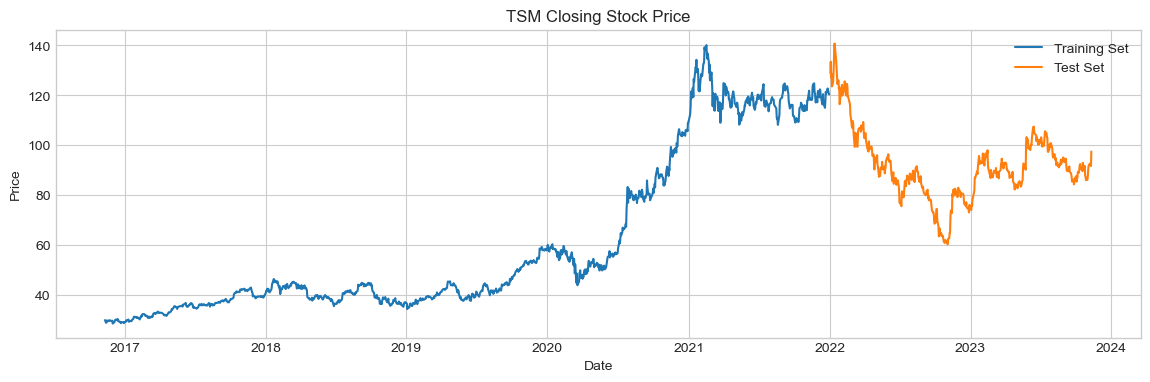

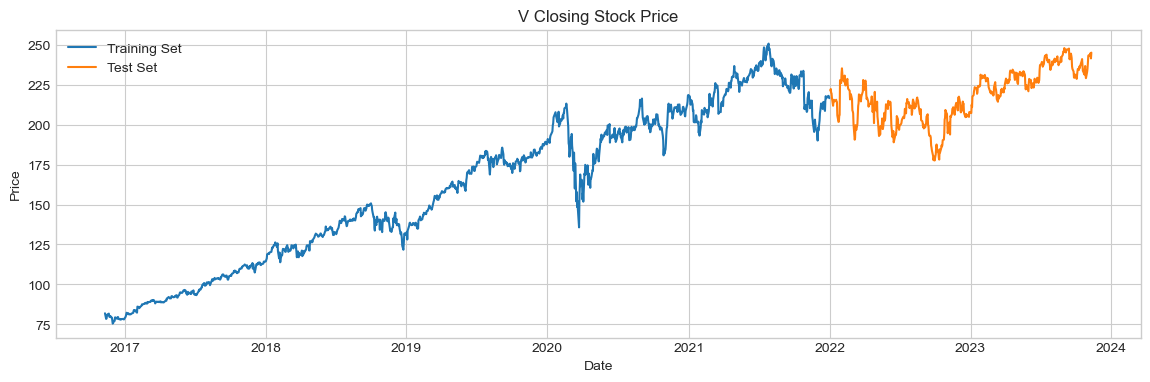

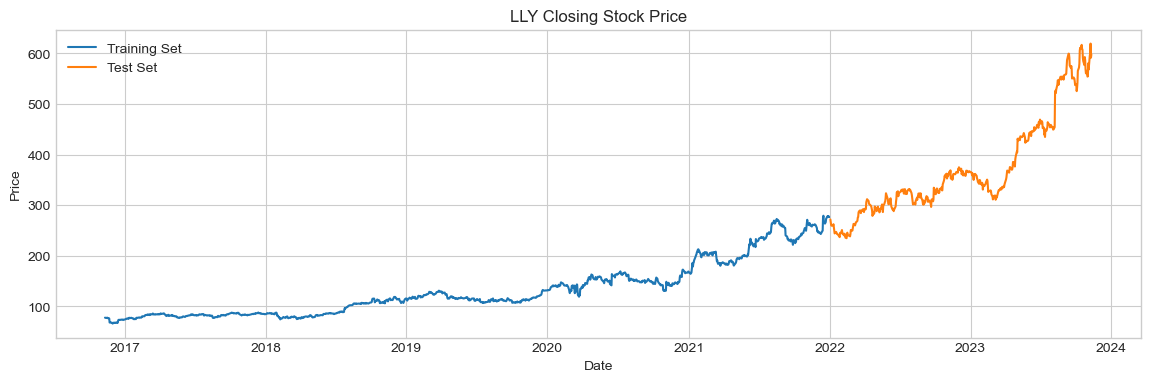

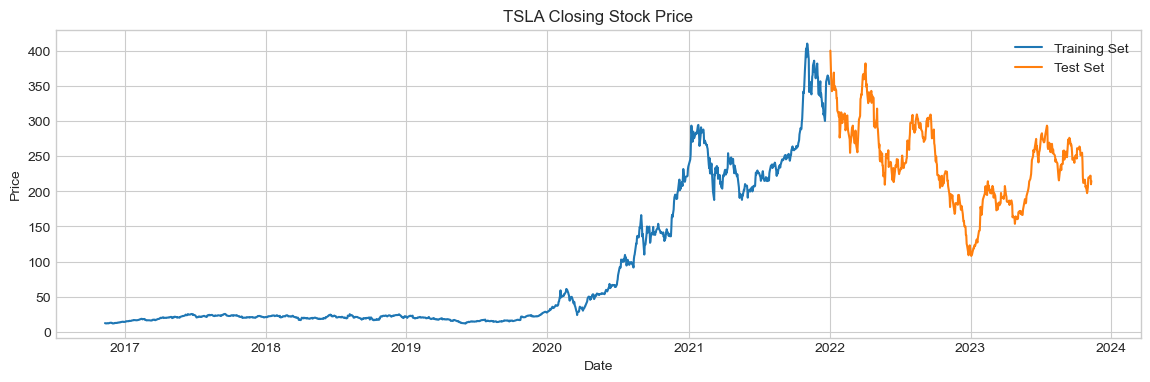

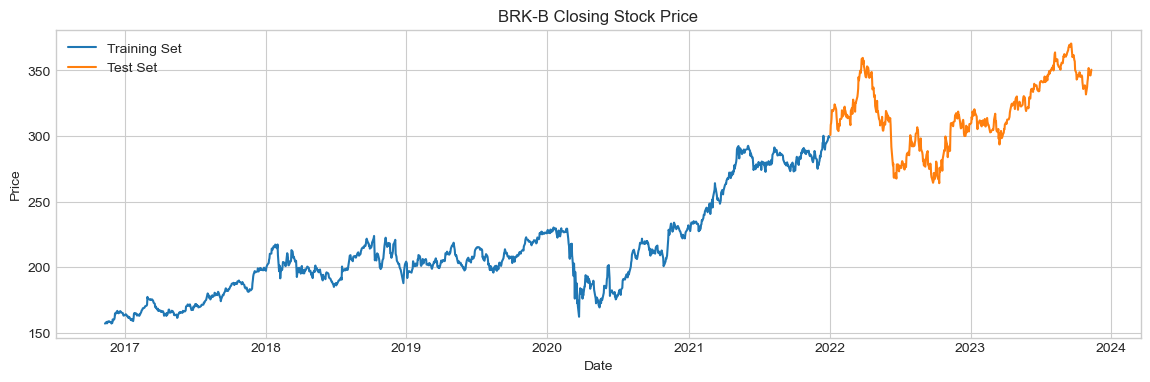

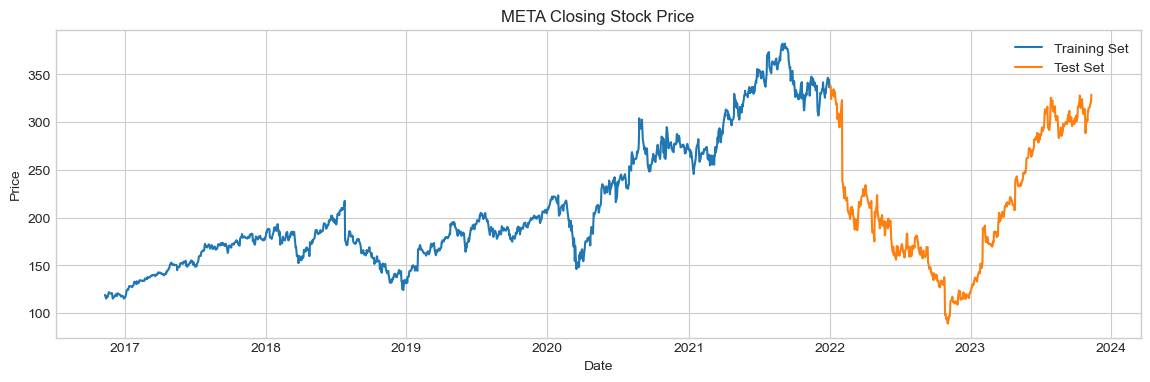

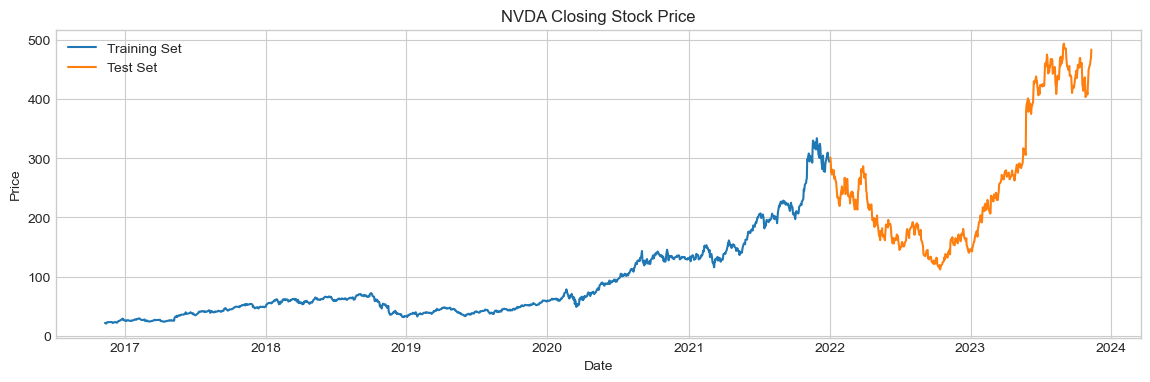

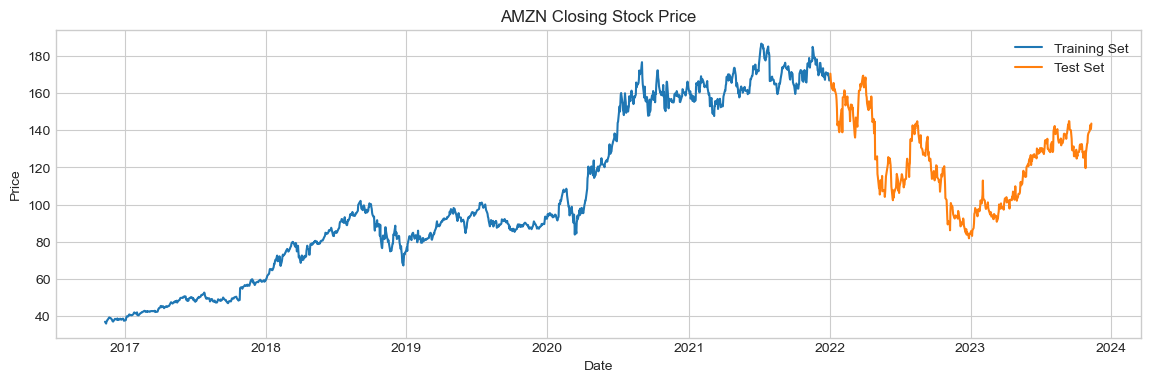

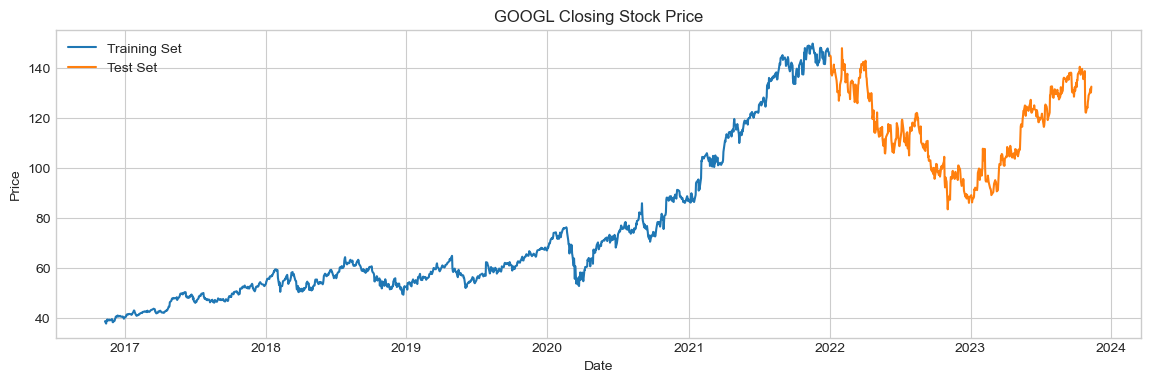

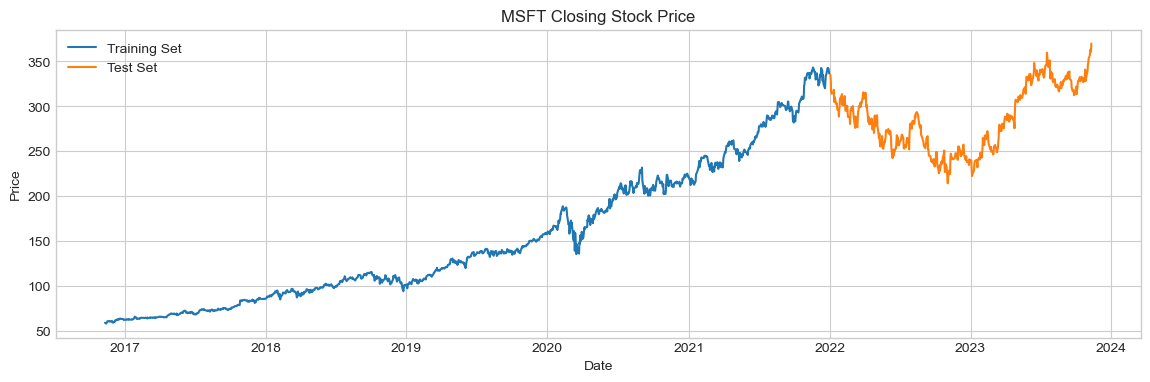

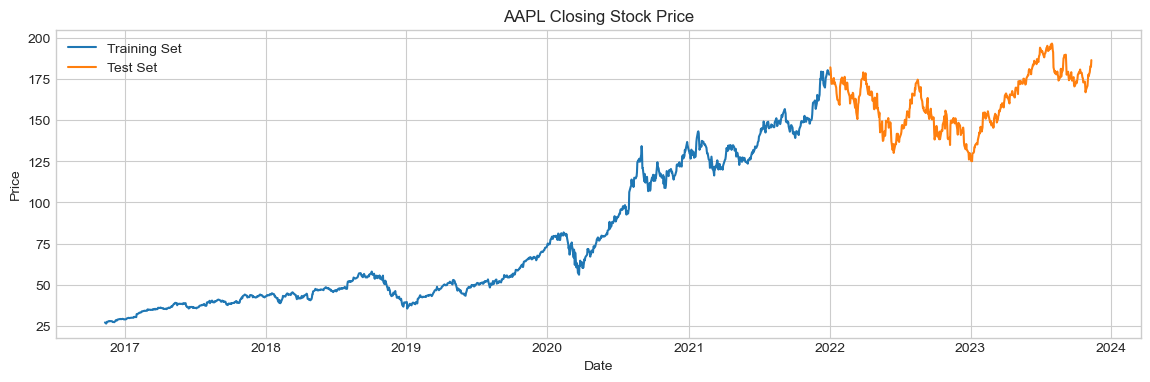

In [58]:
for i in stockList:
    plt.figure(figsize=(14,4))
    plt.plot(df_new[i]["Train"])
    plt.plot(df_new[i]["Test"])
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Closing Stock Price")

In [59]:
# Scaling the training set
transform_train = {}
transform_test = {}
scaler = {}

for num, i in enumerate(stockList):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(df_new[i]["Train"])
    a1 = np.array(df_new[i]["Test"])

    #if num == 1:
        #print(a0)
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)

    #if num == 1:
        #print(a0)

    transform_train[i] = sc.fit_transform(a0)
    transform_test[i] = sc.fit_transform(a1)
    scaler[i] = sc

    if num == 1:
        print(transform_train[i])



del a0
del a1

[[0.11367572]
 [0.10785334]
 [0.10369448]
 ...
 [0.8927517 ]
 [0.91671454]
 [0.93570941]]


In [60]:
# Extract one feature which is closing price

for i in transform_train.keys():
    print(i, transform_train[i].shape)
print("\n")    
for i in transform_test.keys():
    print(i, transform_test[i].shape)

INTC (1293, 1)
PFE (1293, 1)
CMCSA (1293, 1)
SAP (1293, 1)
TMUS (1293, 1)
TMO (1293, 1)
AMD (1293, 1)
NVS (1293, 1)
LIN (1293, 1)
MCD (1293, 1)
NFLX (1293, 1)
AZN (1293, 1)
ACN (1293, 1)
CRM (1293, 1)
BABA (1293, 1)
FMX (1293, 1)
CSCO (1293, 1)
SHEL (1293, 1)
BAC (1293, 1)
PEP (1293, 1)
ABBV (1293, 1)
KO (1293, 1)
TM (1293, 1)
COST (1293, 1)
MRK (1293, 1)
ASML (1293, 1)
CVX (1293, 1)
ADBE (1293, 1)
HD (1293, 1)
ORCL (1293, 1)
JNJ (1293, 1)
PG (1293, 1)
MA (1293, 1)
AVGO (1293, 1)
XOM (1293, 1)
JPM (1293, 1)
WMT (1293, 1)
NVO (1293, 1)
UNH (1293, 1)
TSM (1293, 1)
V (1293, 1)
LLY (1293, 1)
TSLA (1293, 1)
BRK-B (1293, 1)
META (1293, 1)
NVDA (1293, 1)
AMZN (1293, 1)
GOOGL (1293, 1)
MSFT (1293, 1)
AAPL (1293, 1)


INTC (468, 1)
PFE (468, 1)
CMCSA (468, 1)
SAP (468, 1)
TMUS (468, 1)
TMO (468, 1)
AMD (468, 1)
NVS (468, 1)
LIN (468, 1)
MCD (468, 1)
NFLX (468, 1)
AZN (468, 1)
ACN (468, 1)
CRM (468, 1)
BABA (468, 1)
FMX (468, 1)
CSCO (468, 1)
SHEL (468, 1)
BAC (468, 1)
PEP (468, 1)
ABBV (468, 1)

In [61]:
trainset = {}
testset = {}
for j in stockList:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(60,1293):
        X_train.append(transform_train[j][i-60:i,0]) #What is the meaning of zero
        y_train.append(transform_train[j][i,0])
    #if j == "AAPL":
            #print(y_train)
    X_train, y_train = np.array(X_train), np.array(y_train)
    '''
    if j == "AAPL":
        print(X_train)
        print(y_train)
'''
    

    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1)) #Reshape from 2D to 3D by adding a dimension with 1s
    trainset[j]["y"] = y_train
    '''''
    if j == "AAPL":
        print(trainset[j]["X"])
        print(trainset[j]["y"])
        buff["X_train"] = trainset[j]["X"].shape
        print(buff["X_train"])
        '''

    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(60, 468):
        X_test.append(transform_test[j][i-60:i,0])
        y_test.append(transform_test[j][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test


In [62]:
arr_buff = []
for i in stockList:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=stockList)

X_train  y_train        X_test  y_test
INTC   (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
PFE    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
CMCSA  (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
SAP    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
TMUS   (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
TMO    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
AMD    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
NVS    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
LIN    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
MCD    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
NFLX   (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
AZN    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
ACN    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
CRM    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
BABA   (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
FMX    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
CSCO   (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
SHEL   (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
BAC    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
PEP    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
ABBV   (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
KO     (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
TM     (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
COST   (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
MRK    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
ASML   (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
CVX    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
ADBE   (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
HD     (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
ORCL   (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
JNJ    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
PG     (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
MA     (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
AVGO   (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
XOM    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
JPM    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
WMT    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
NVO    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
UNH    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
TSM    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
V      (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
LLY    (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
TSLA   (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
BRK-B  (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
META   (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
NVDA   (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
AMZN   (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
GOOGL  (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
MSFT   (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)
AAPL   (1233, 60, 1)  (1233,)  (408, 60, 1)  (408,)

In [64]:
%%time
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))  # search what is the input_shape?
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))    # How number of layers will matter the training result?
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')
# Fitting to the training set
for i in stockList:
    print("Fitting to", i)
    regressor.fit(trainset[i]["X"], trainset[i]["y"], epochs=10, batch_size=200)

Fitting to INTC
Epoch 1/10
7/7 [==============================] - 7s 202ms/step - loss: 0.1133
Epoch 2/10
7/7 [==============================] - 1s 207ms/step - loss: 0.0384
Epoch 3/10
7/7 [==============================] - 2s 250ms/step - loss: 0.0287
Epoch 4/10
7/7 [==============================] - 2s 251ms/step - loss: 0.0281
Epoch 5/10
7/7 [==============================] - 2s 224ms/step - loss: 0.0219
Epoch 6/10
7/7 [==============================] - 1s 205ms/step - loss: 0.0188
Epoch 7/10
7/7 [==============================] - 2s 287ms/step - loss: 0.0172
Epoch 8/10
7/7 [==============================] - 2s 274ms/step - loss: 0.0164
Epoch 9/10
7/7 [==============================] - 2s 246ms/step - loss: 0.0171
Epoch 10/10
7/7 [==============================] - 2s 252ms/step - loss: 0.0171
Fitting to PFE
Epoch 1/10
7/7 [==============================] - 2s 249ms/step - loss: 0.0069
Epoch 2/10
7/7 [==============================] - 2s 279ms/step - loss: 0.0069
Epoch 3/10
7/7 [====

/var/folders/tt/rynv9sfx6hd7zsm3w8y6qv8c0000gn/T/ipykernel_7019/4208822880.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))


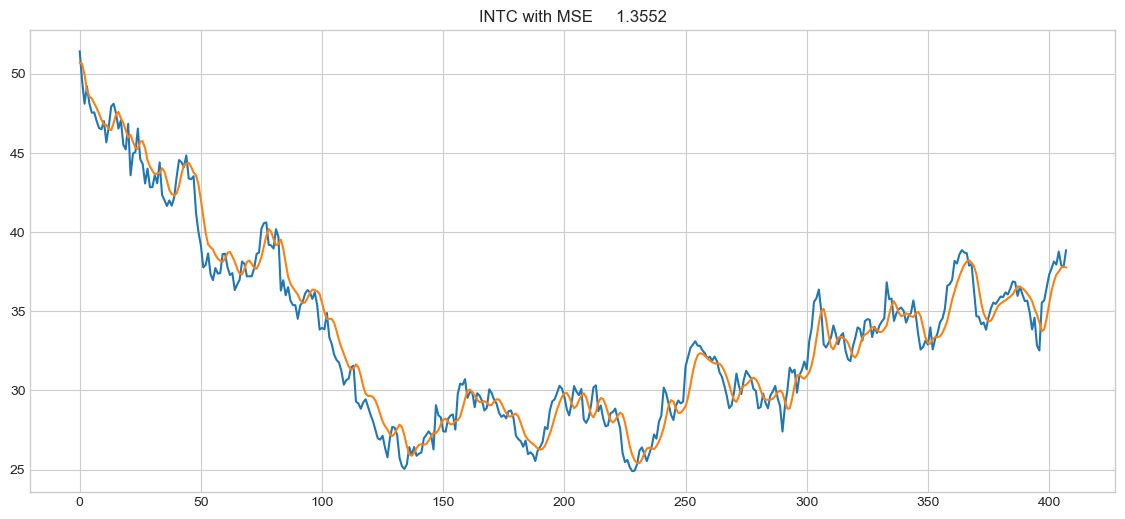

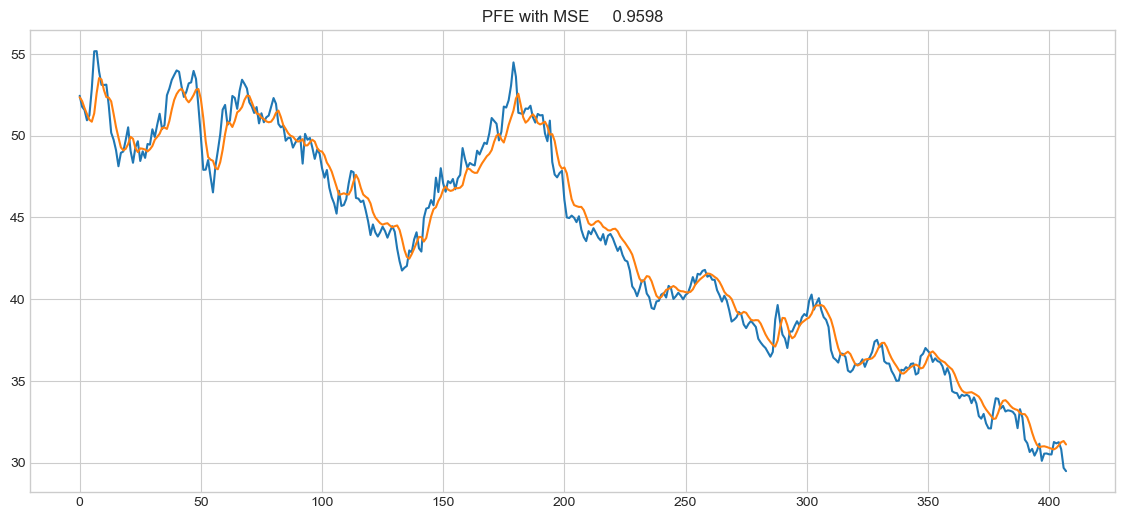

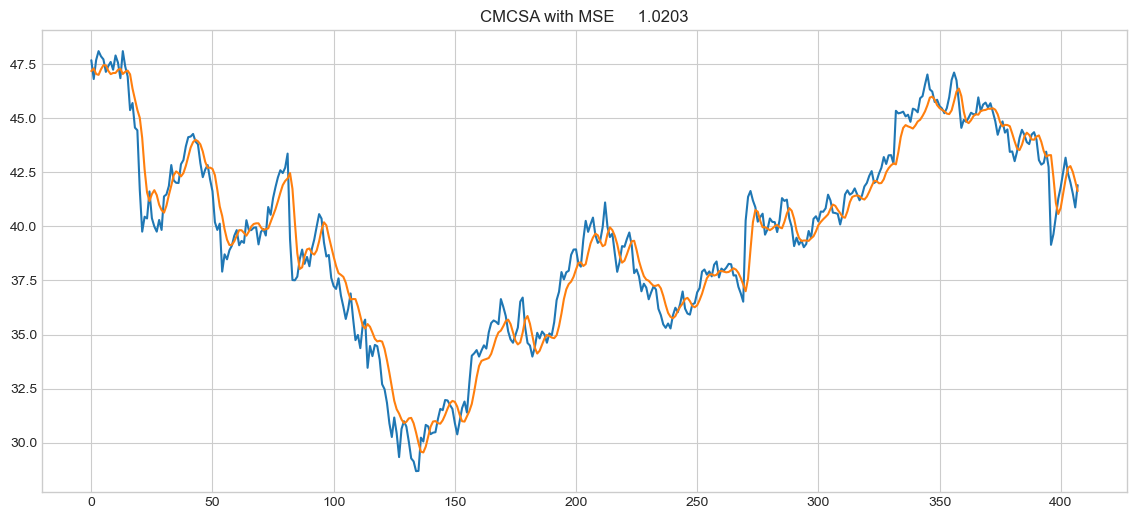

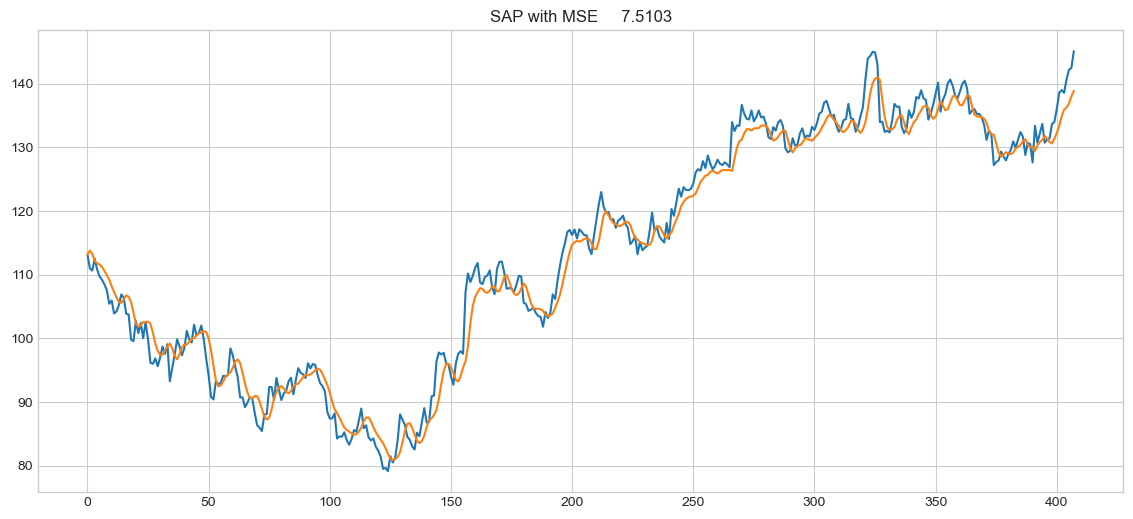

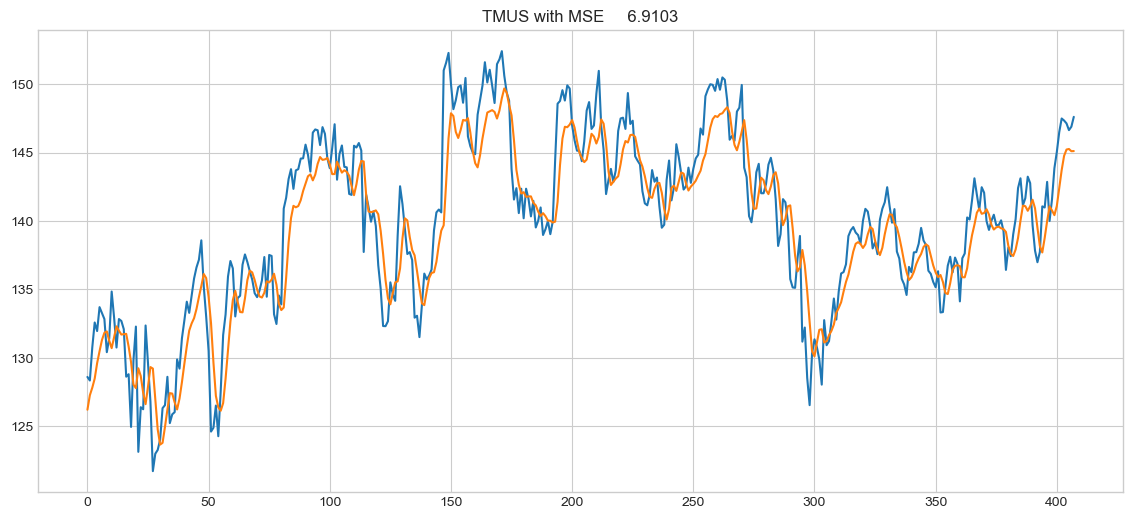

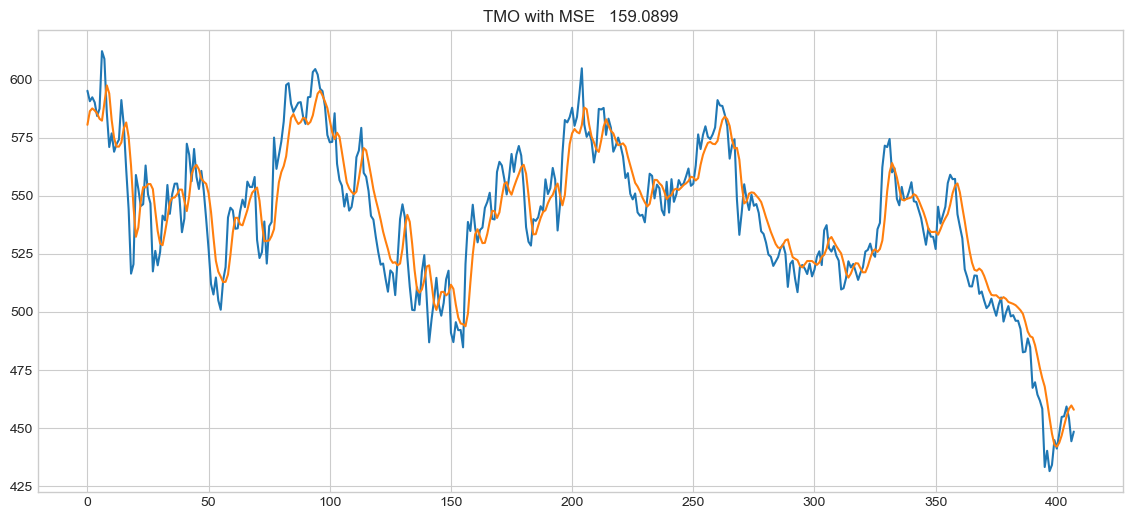

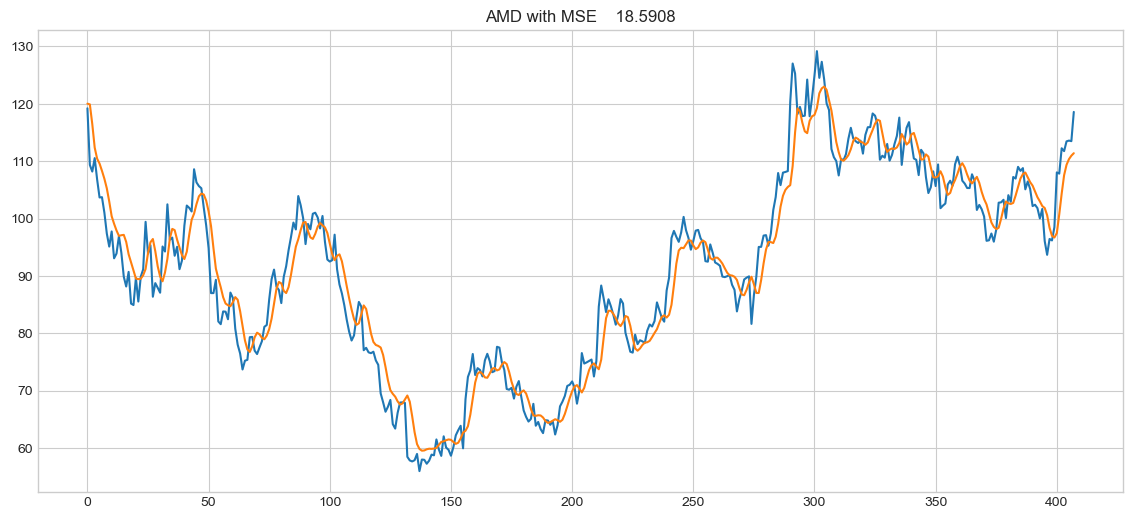

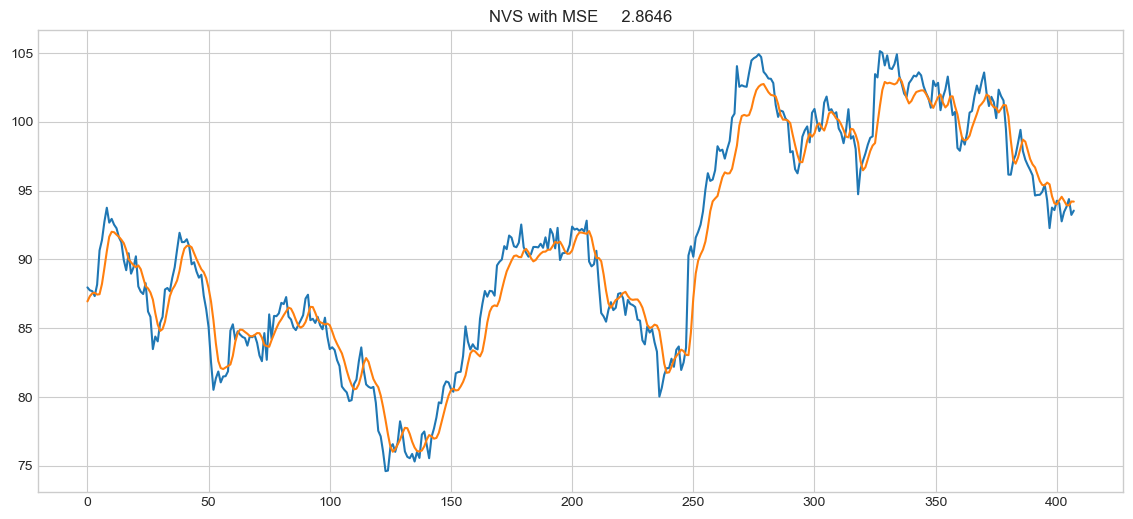

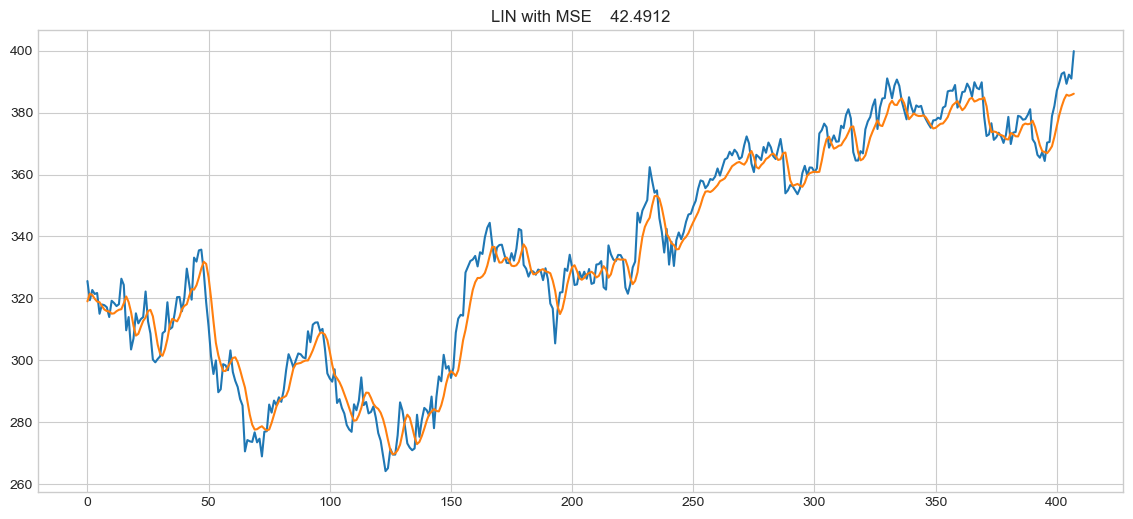

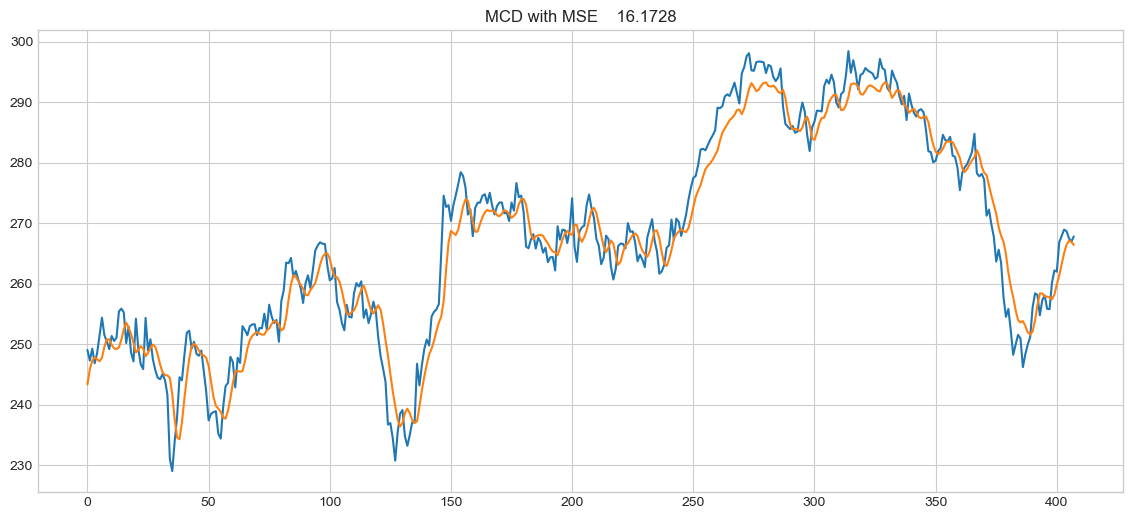

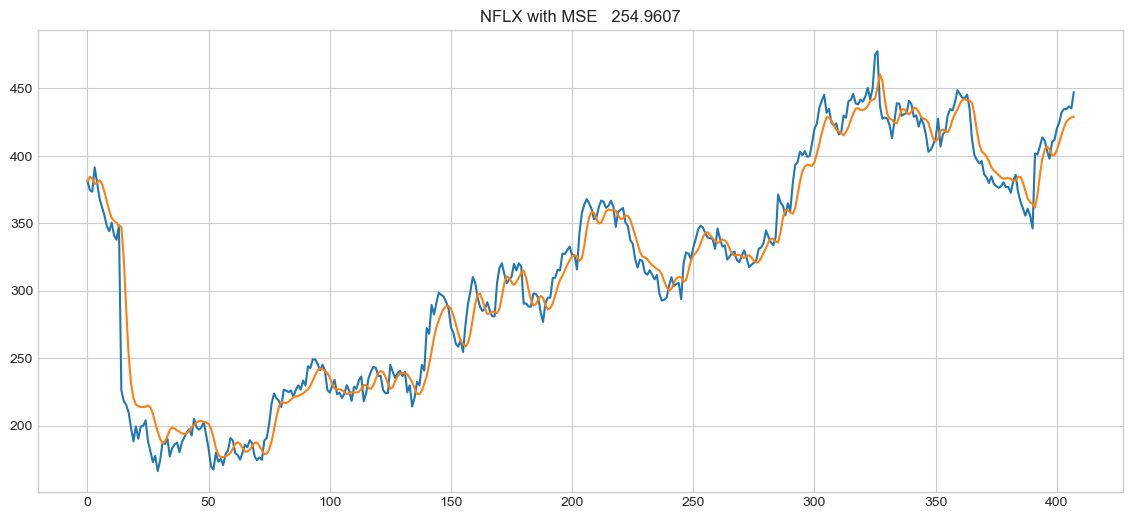

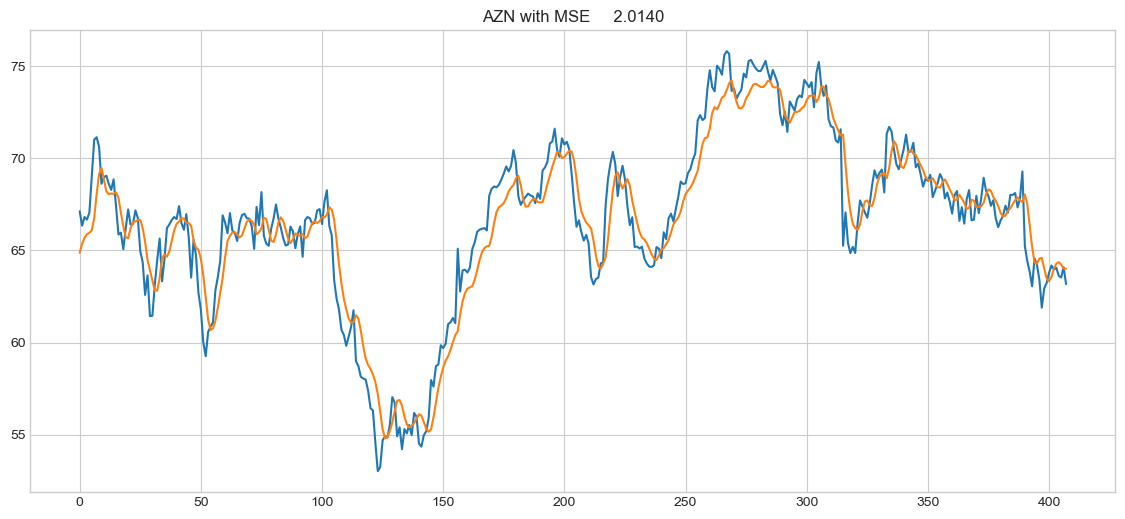

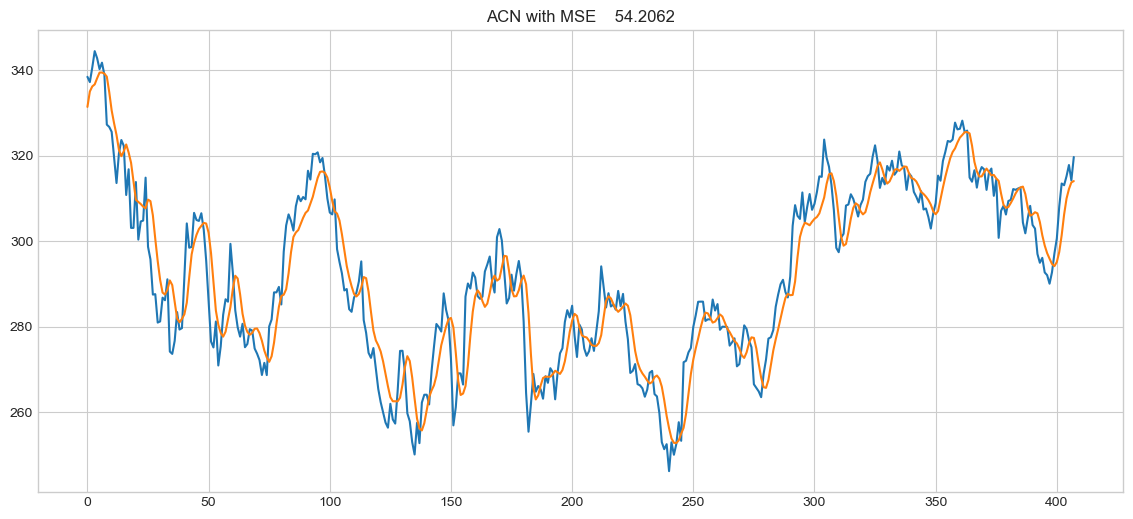

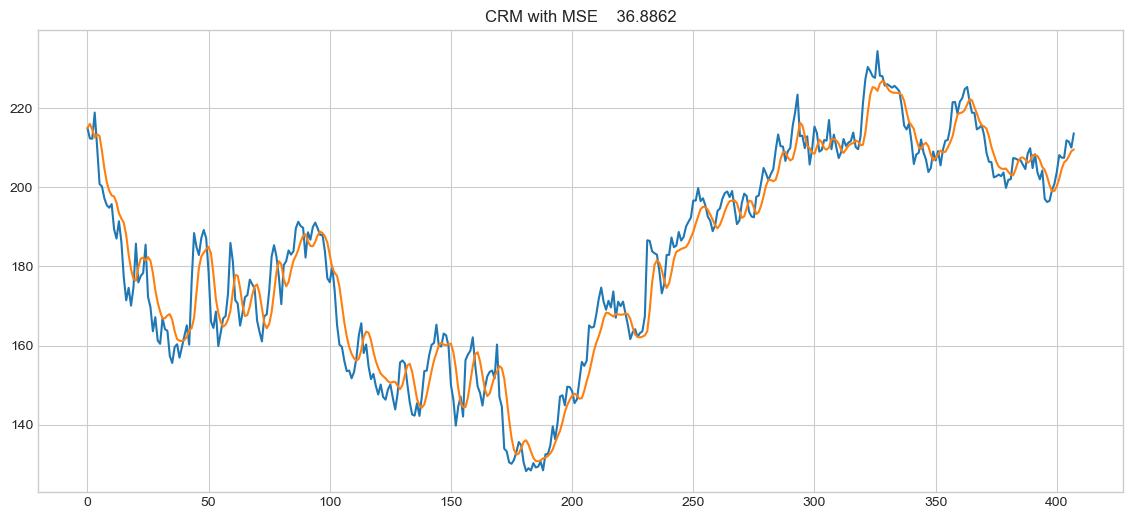

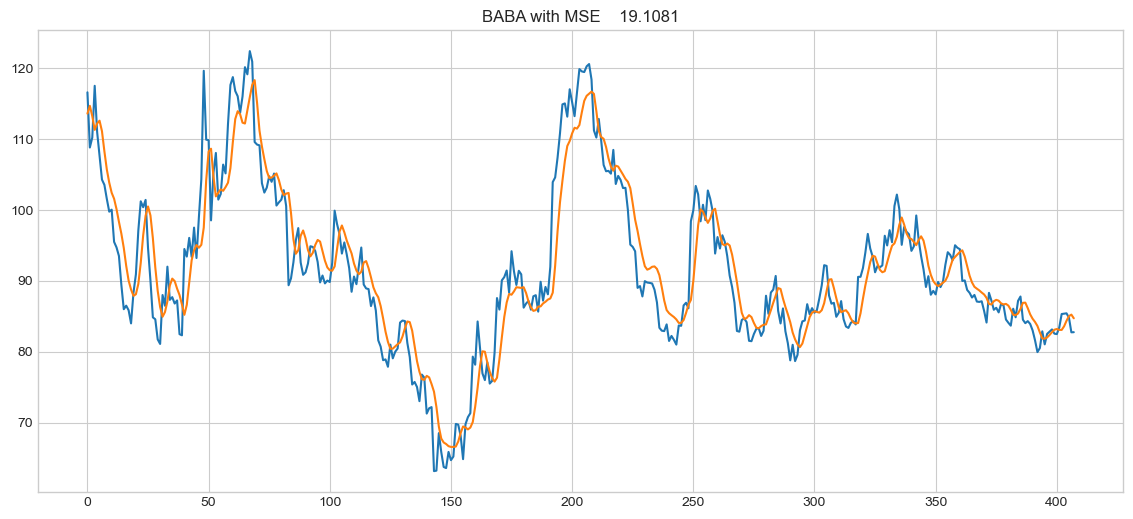

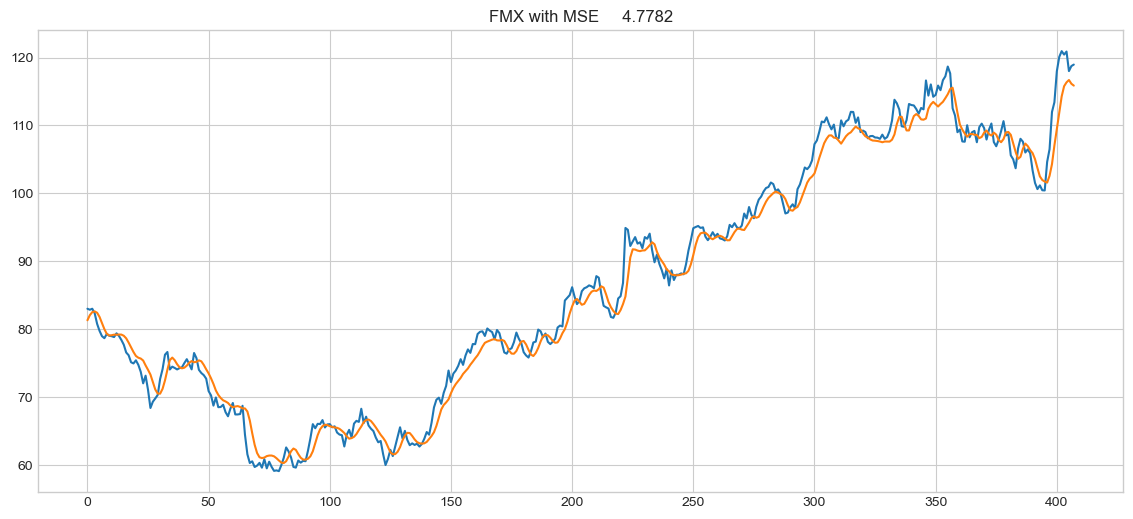

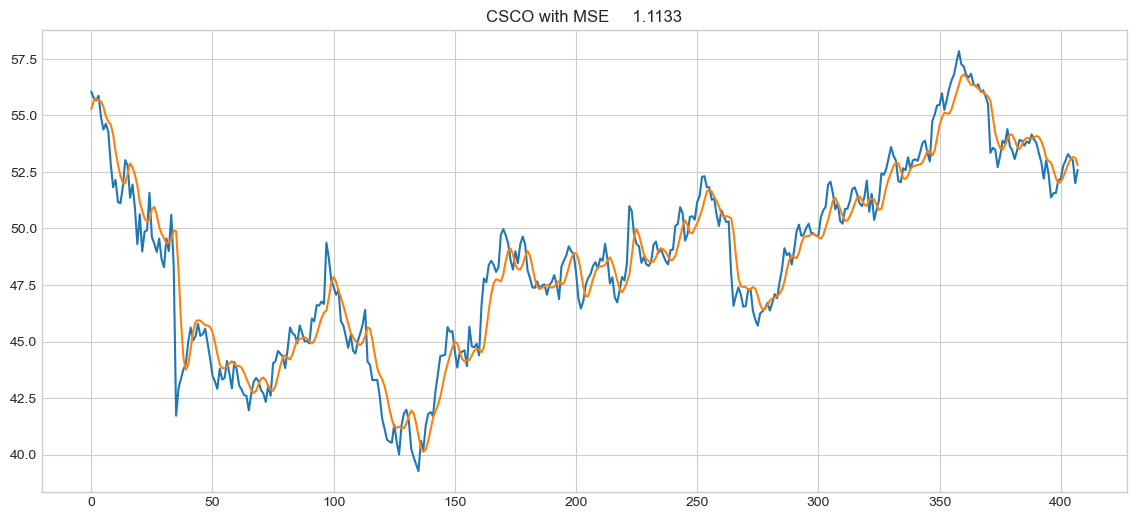

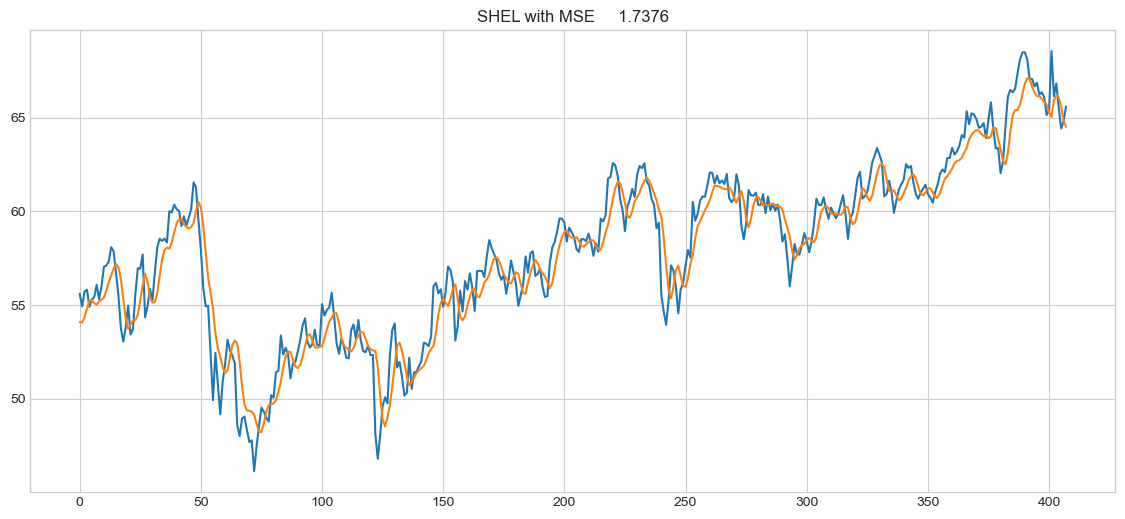

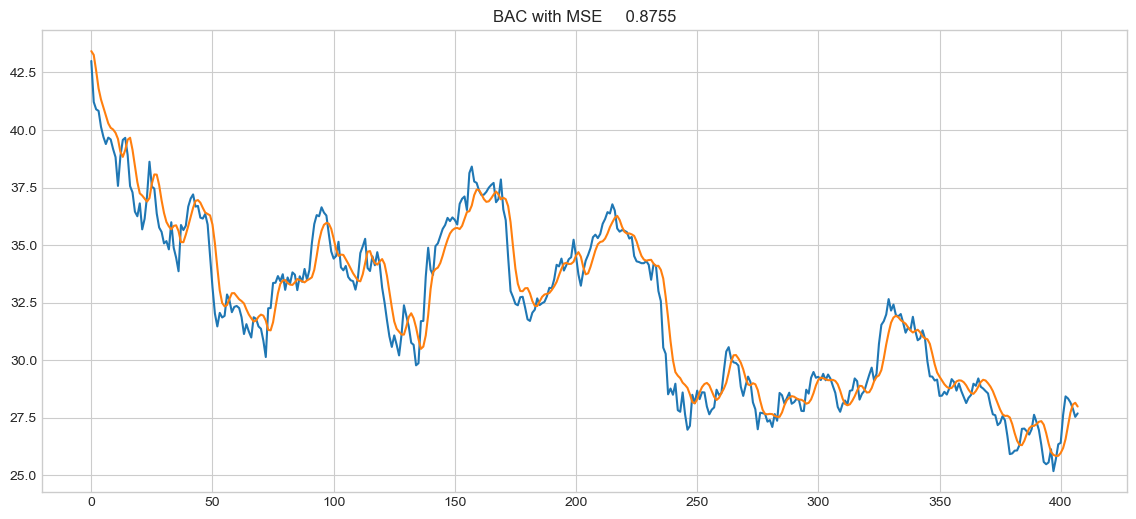

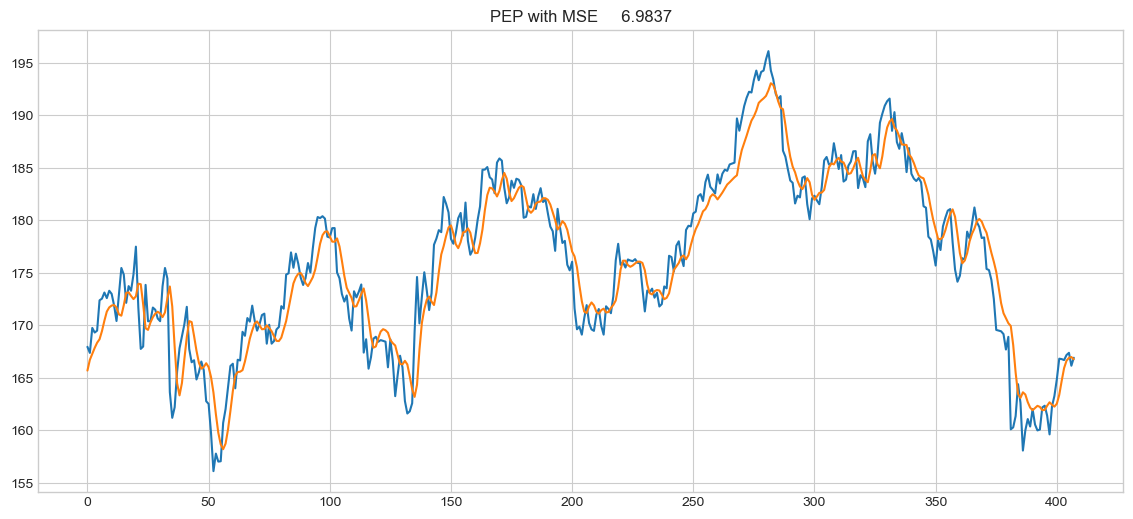

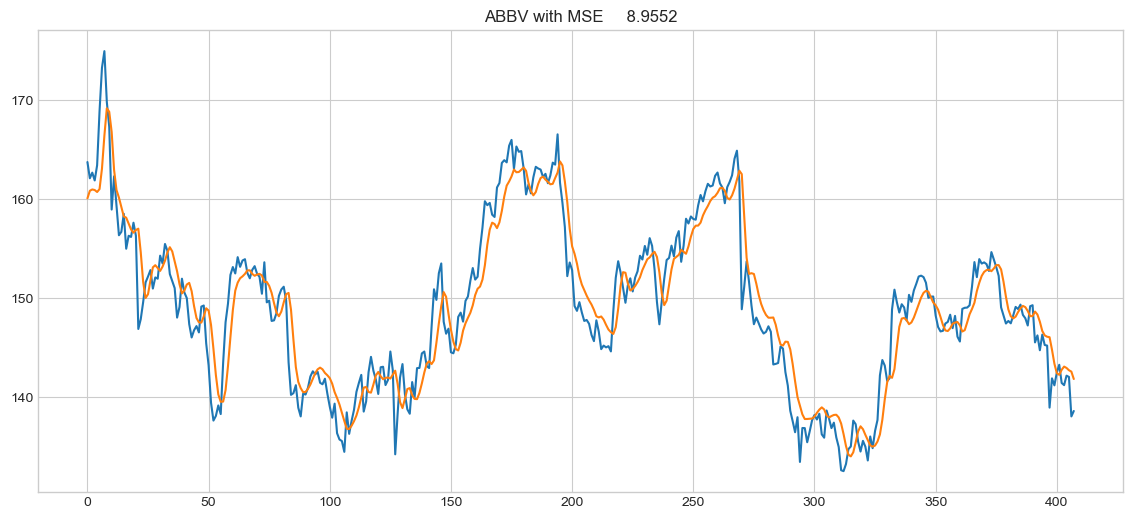

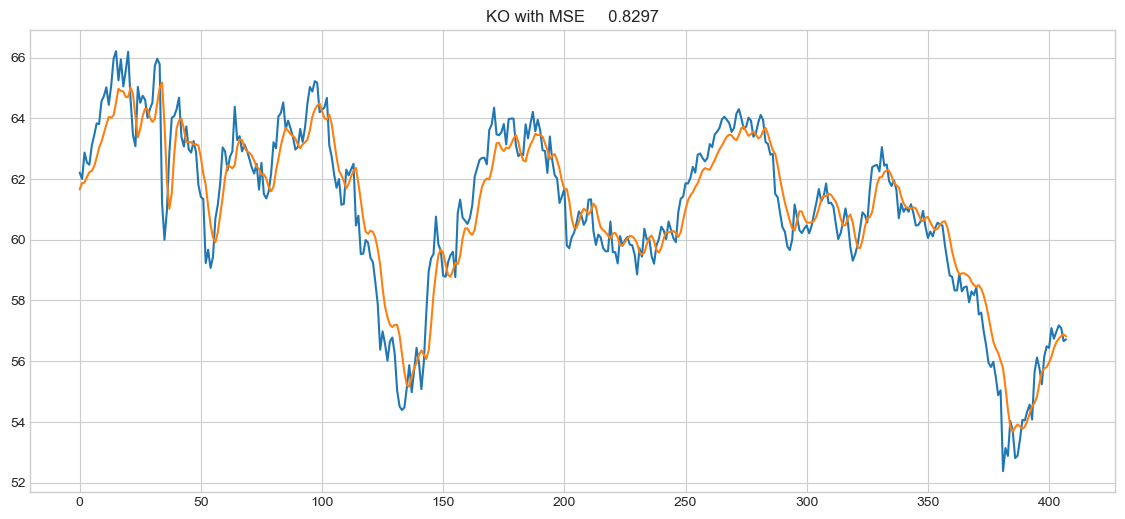

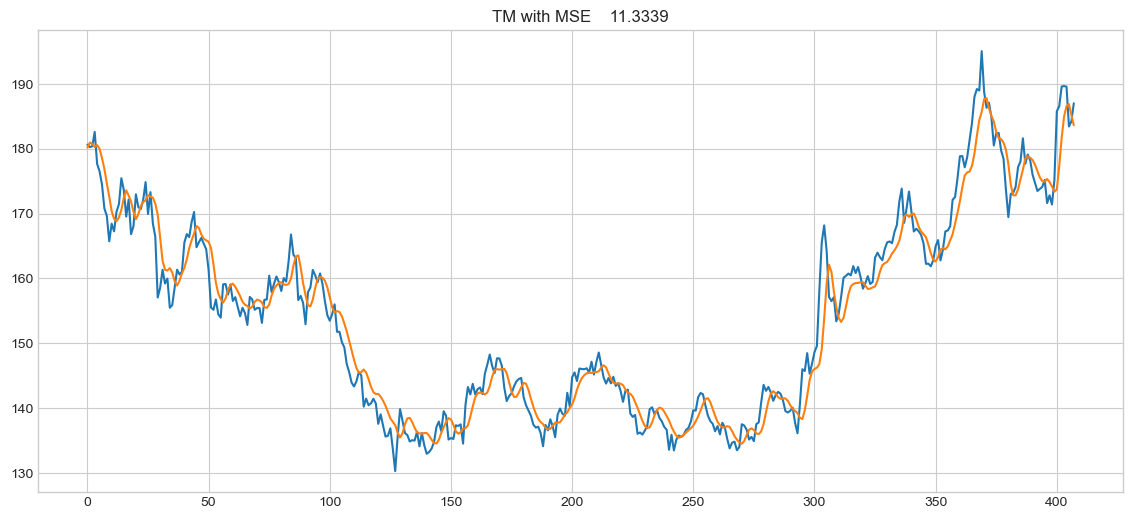

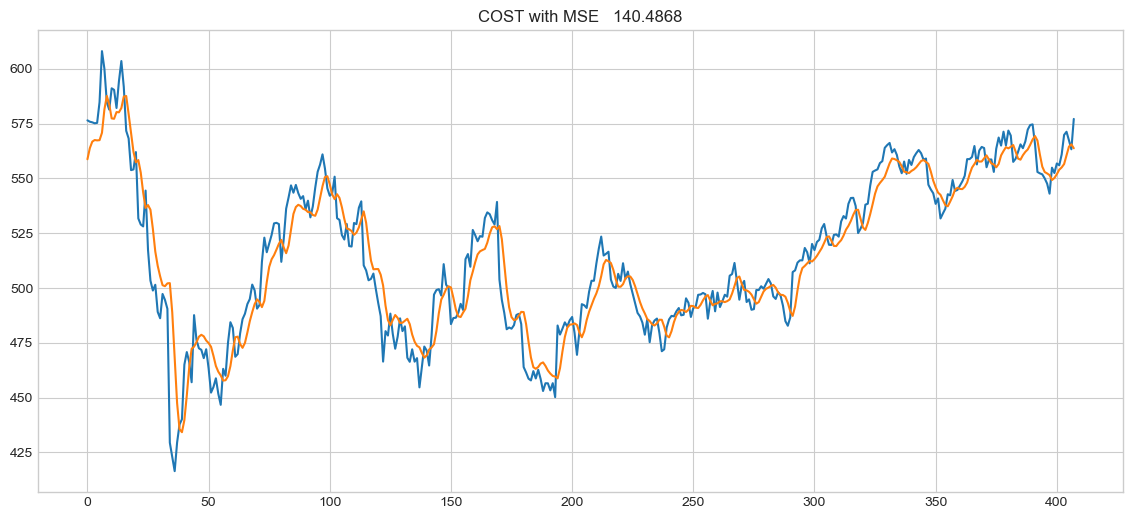

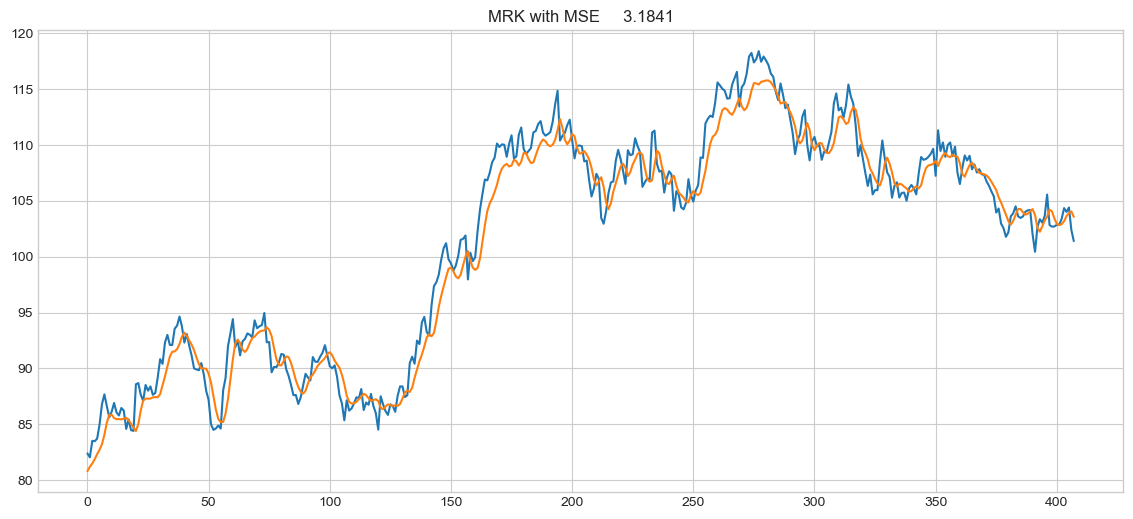

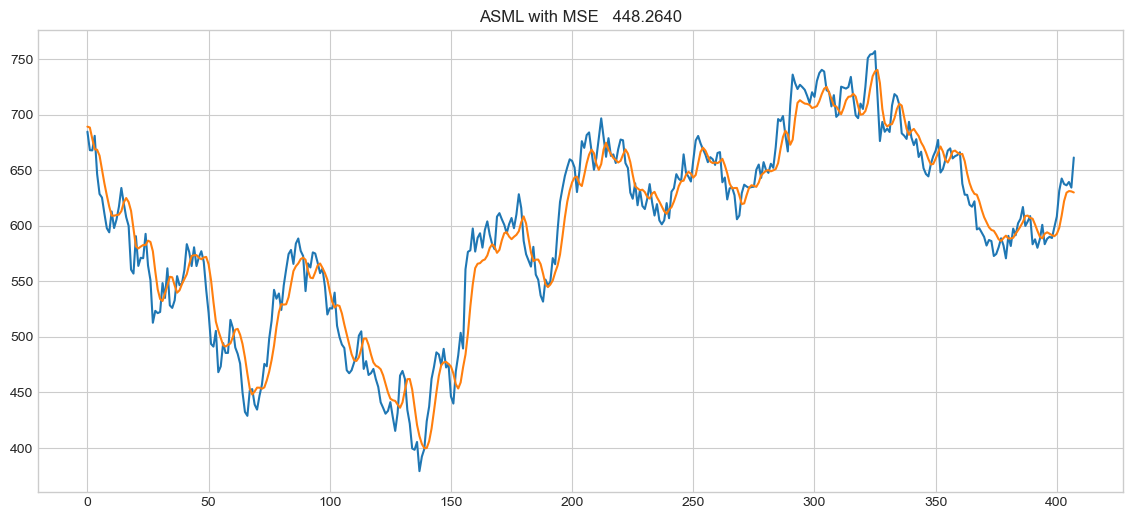

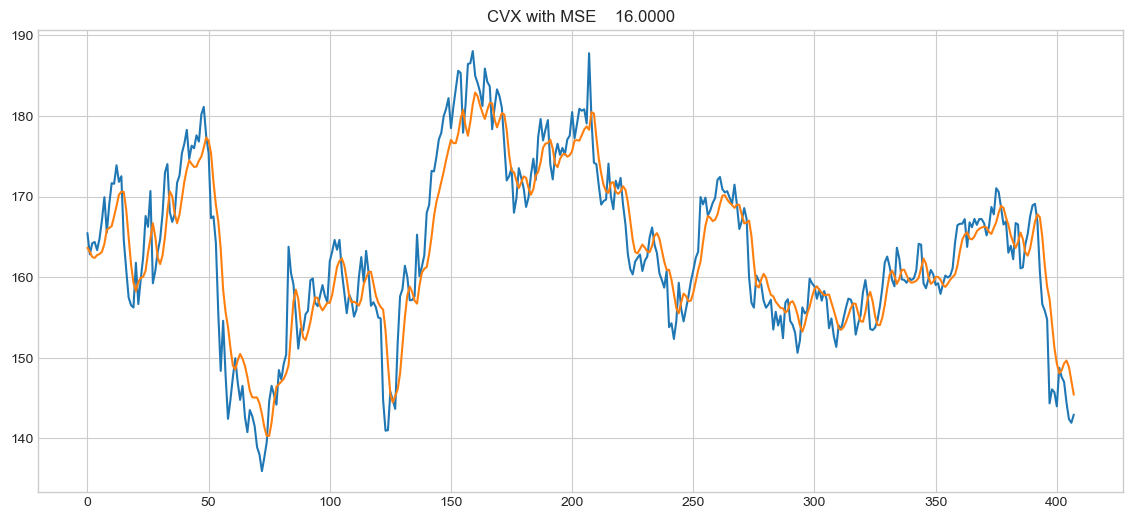

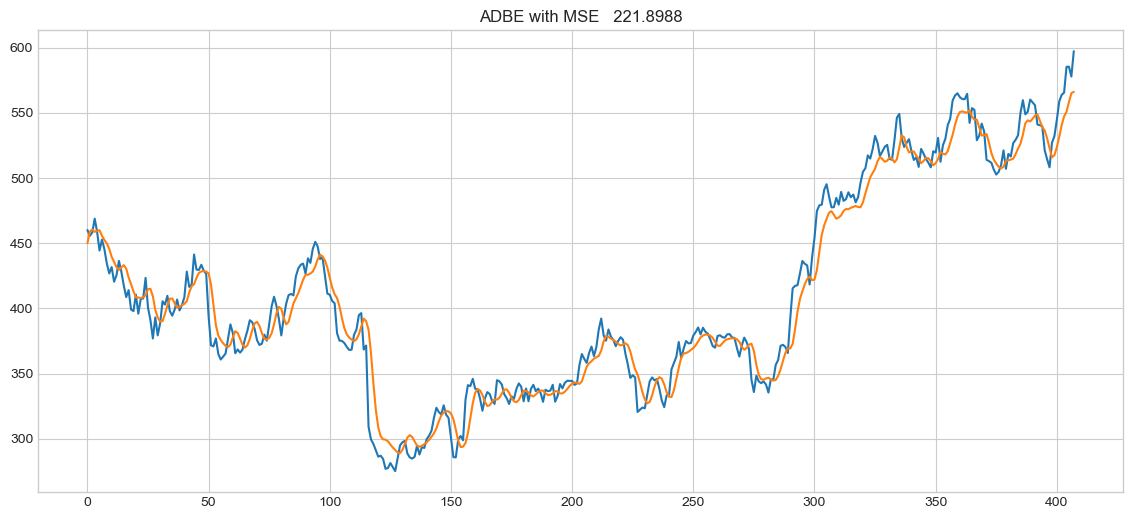

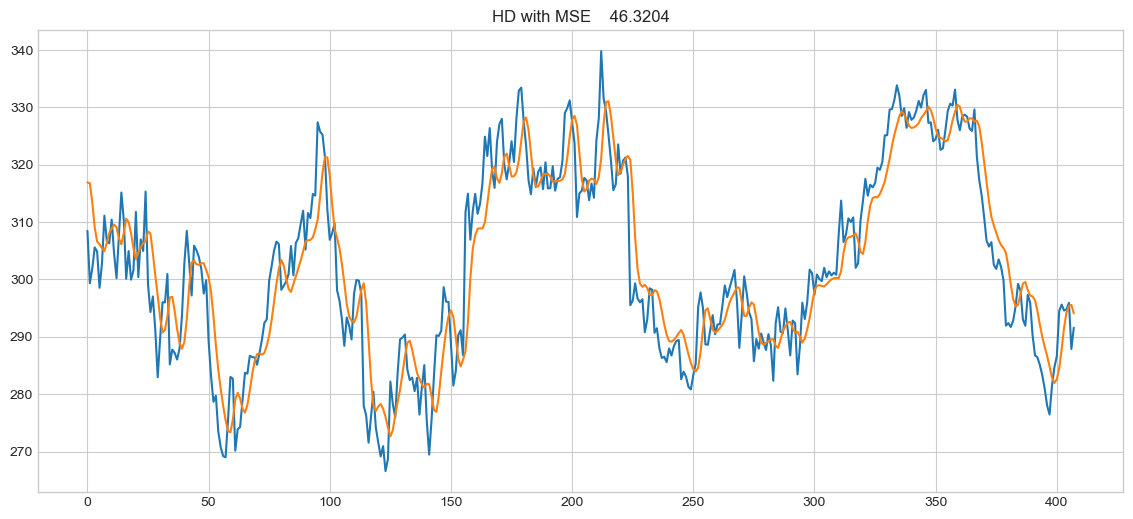

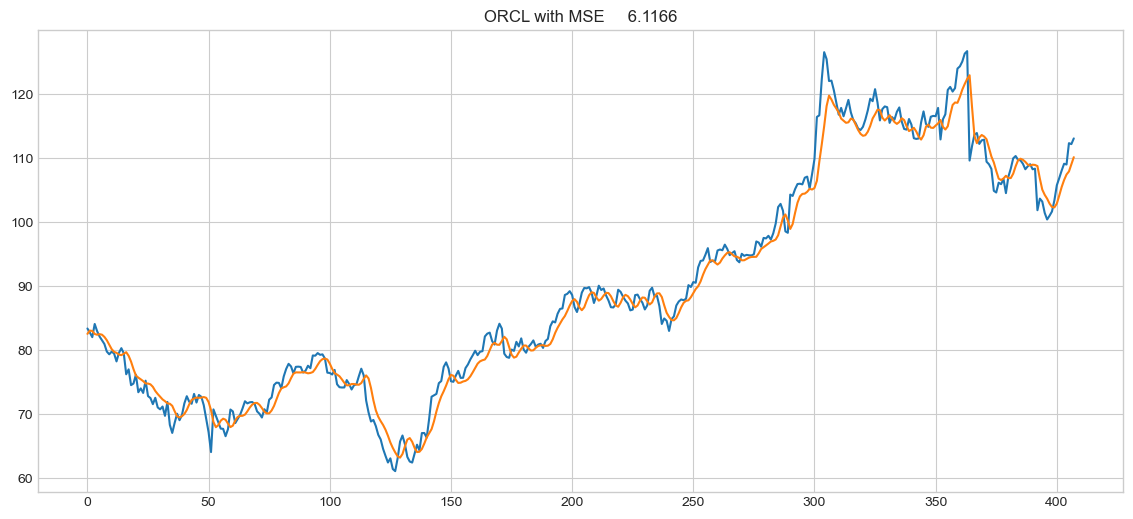

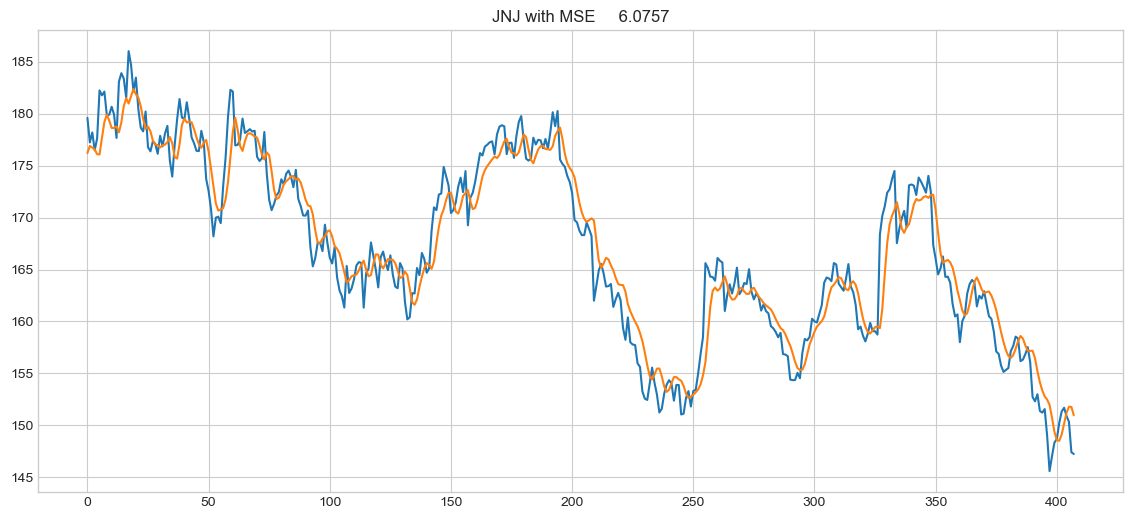

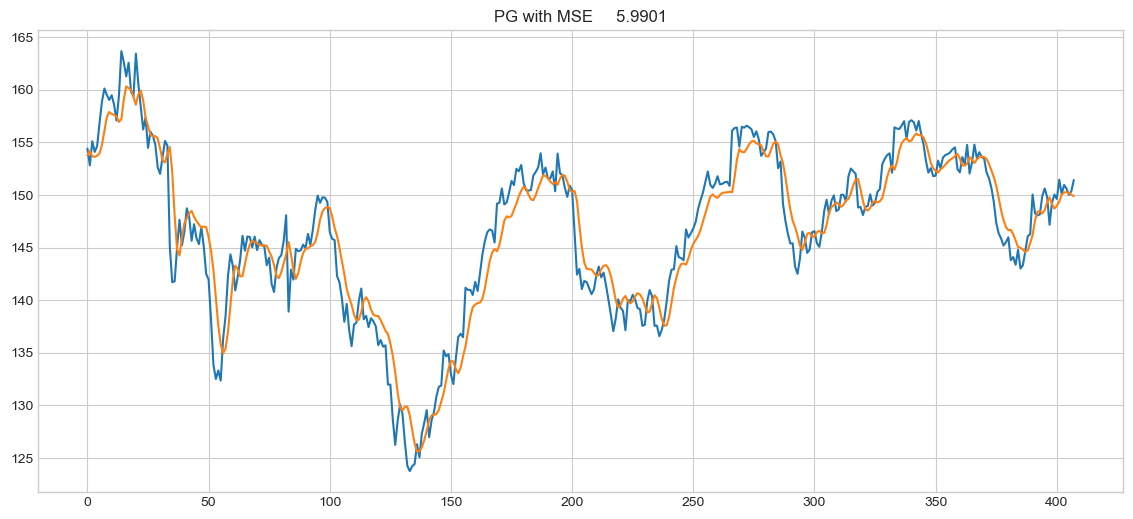

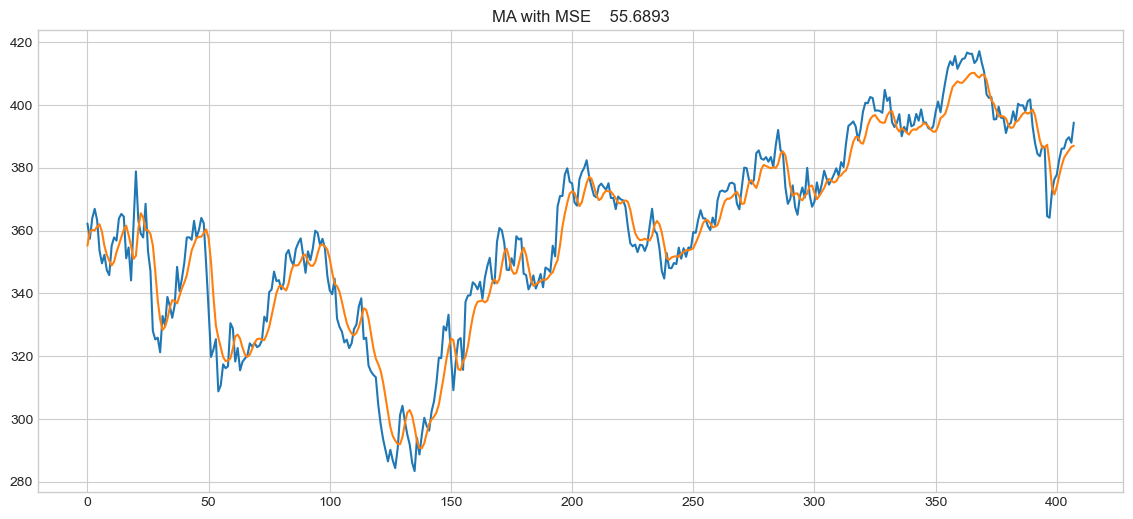

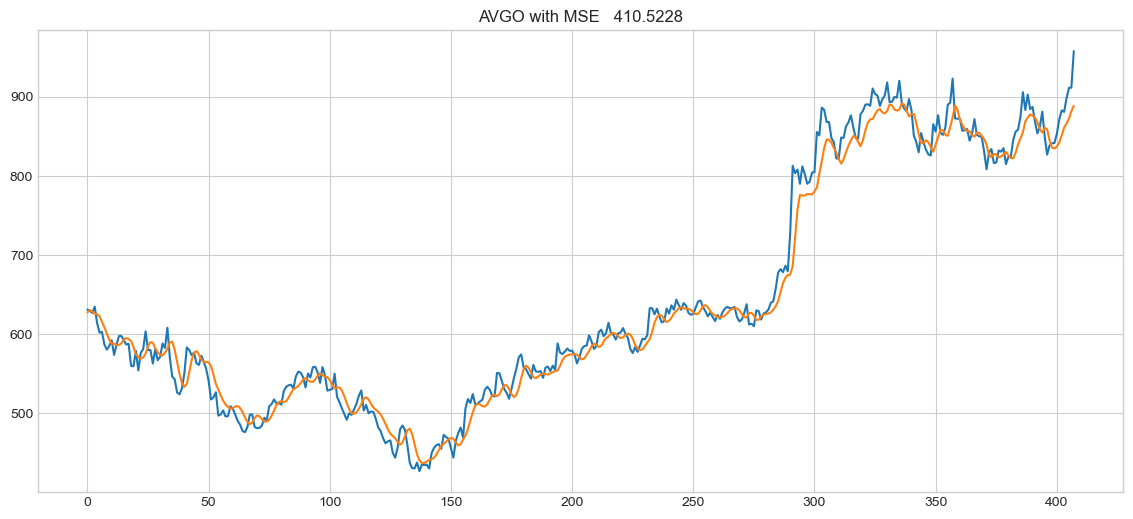

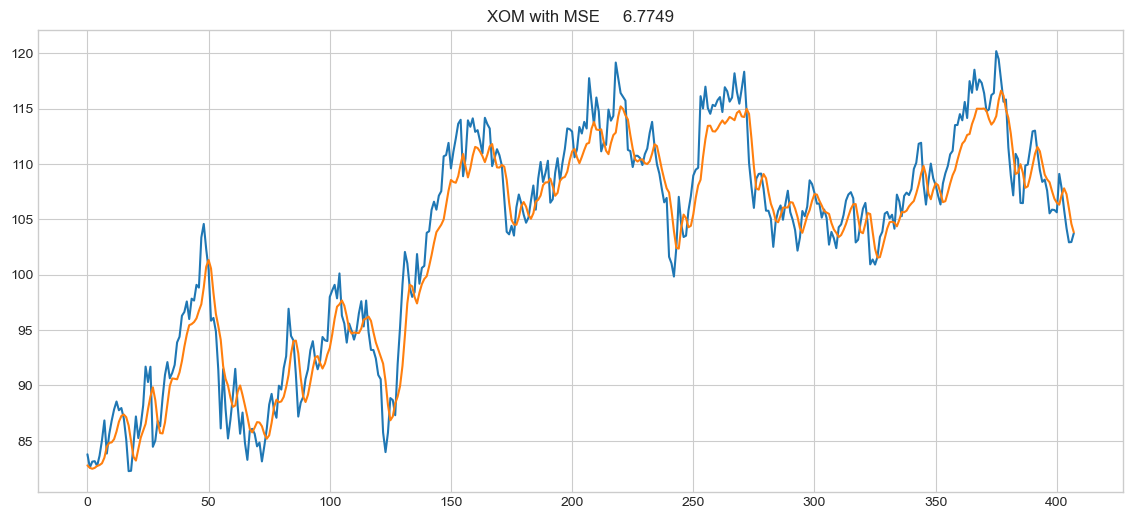

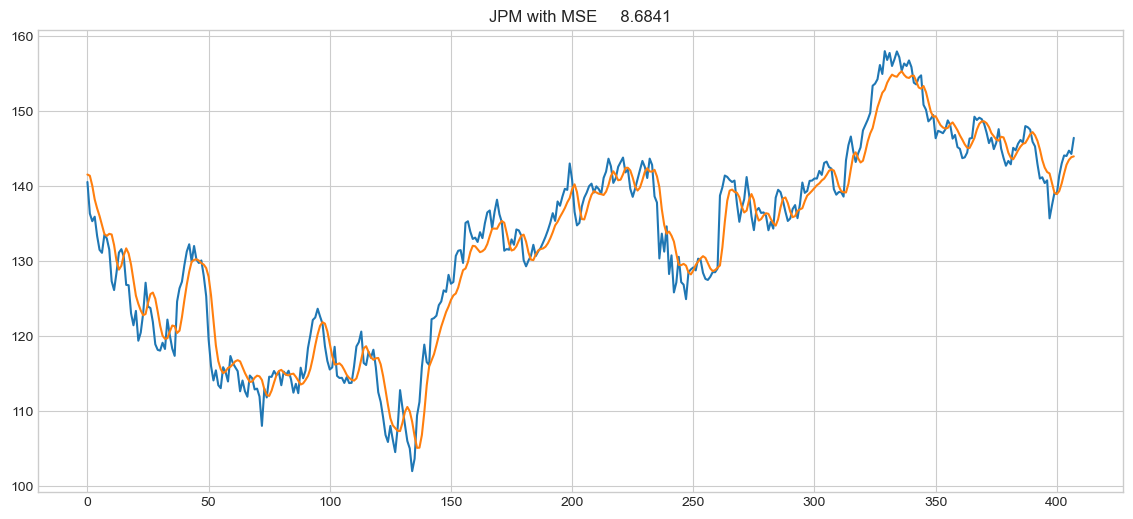

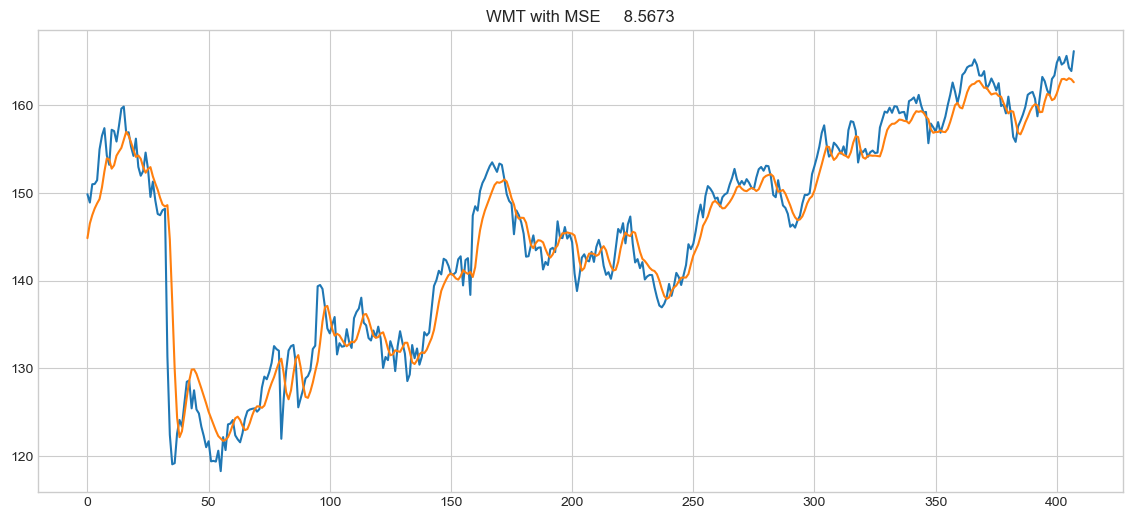

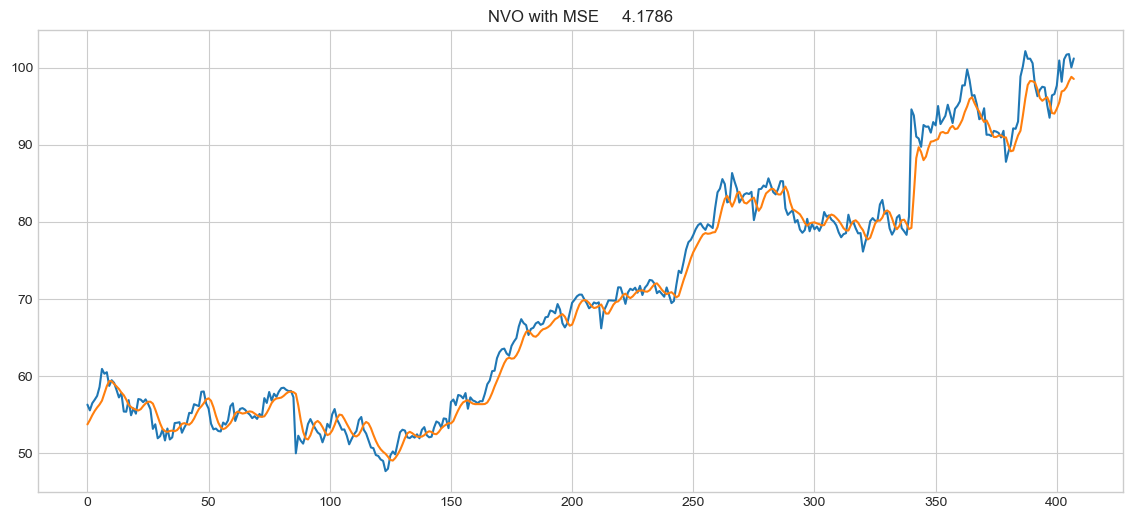

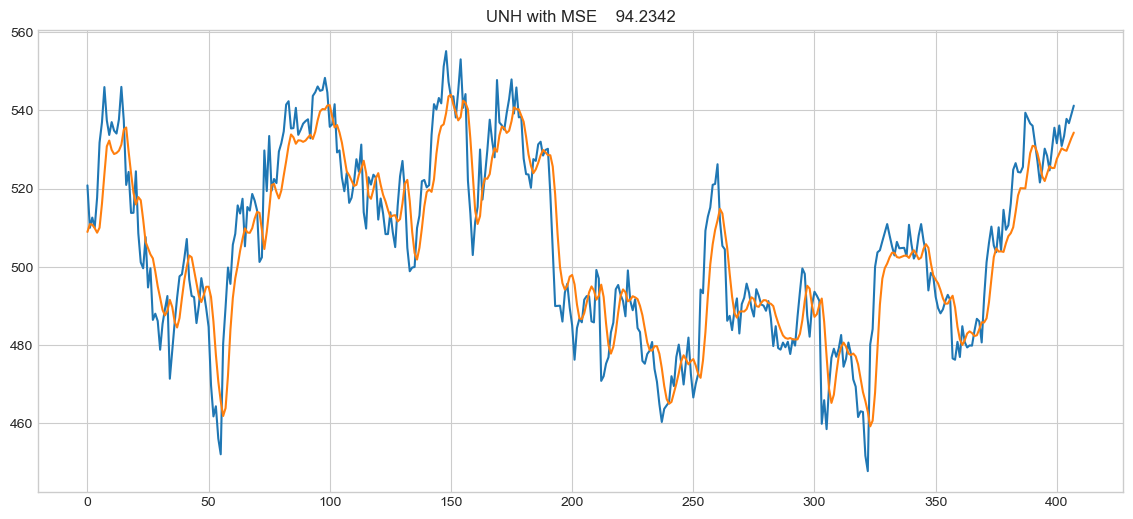

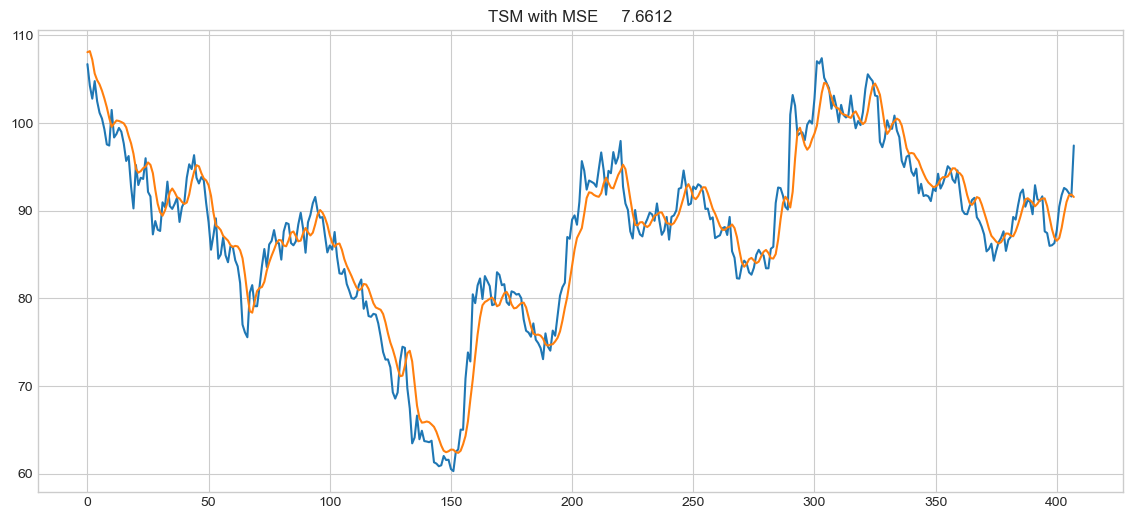

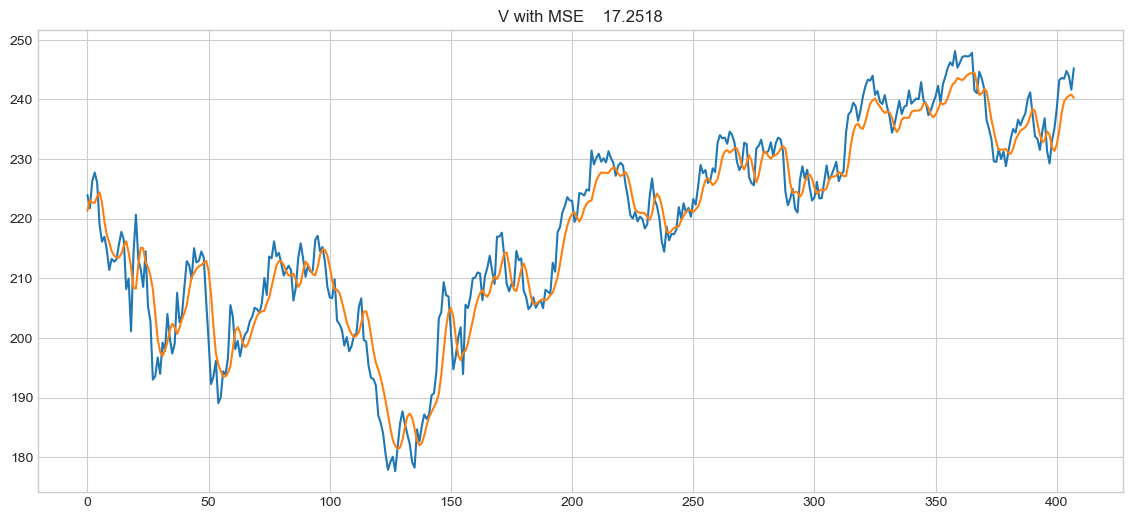

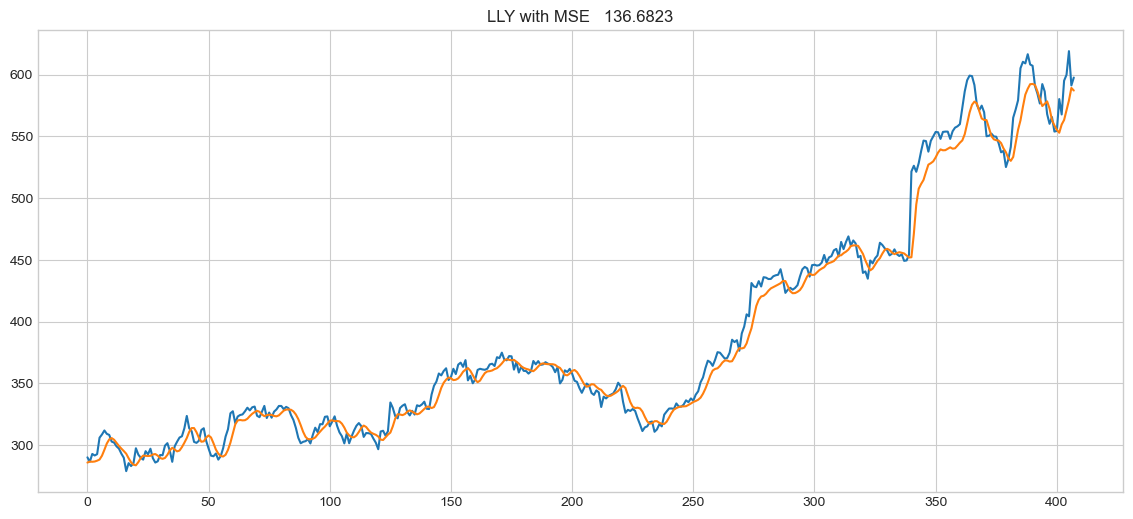

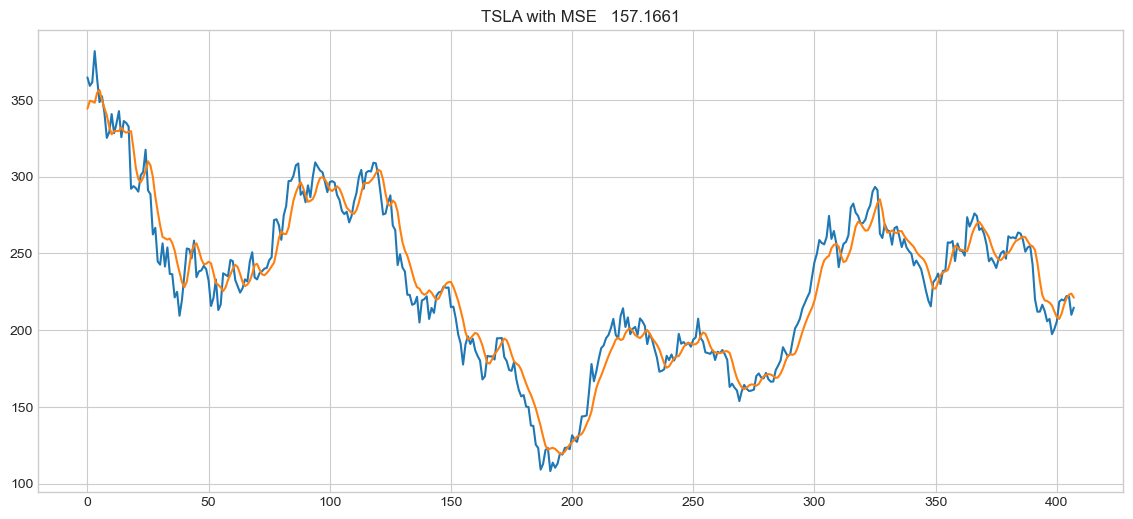

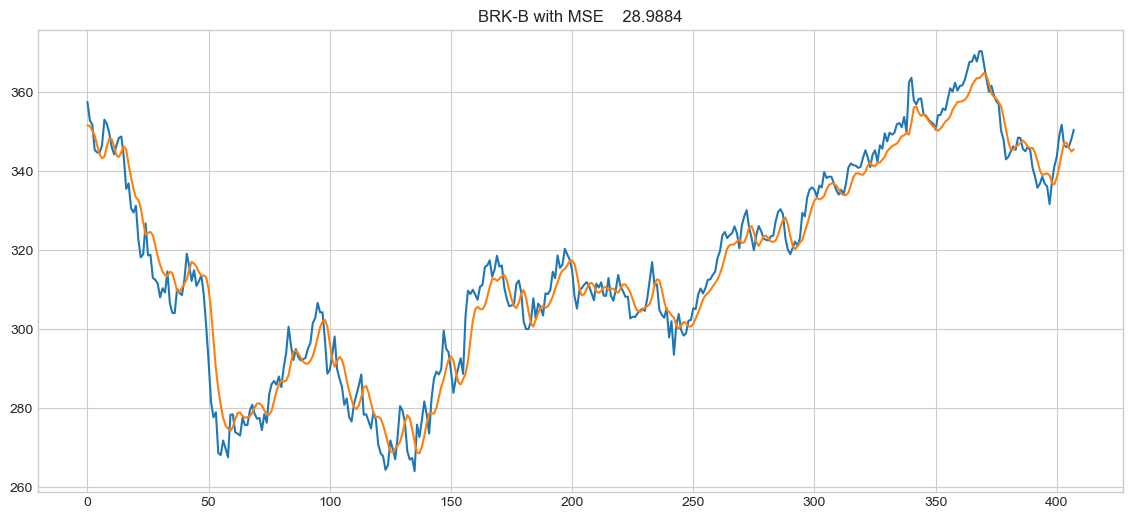

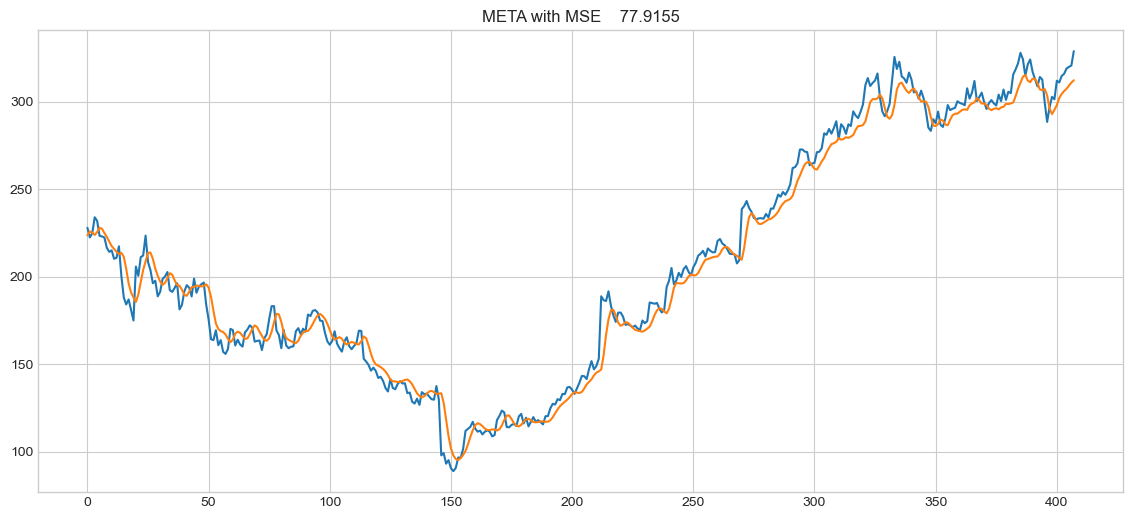

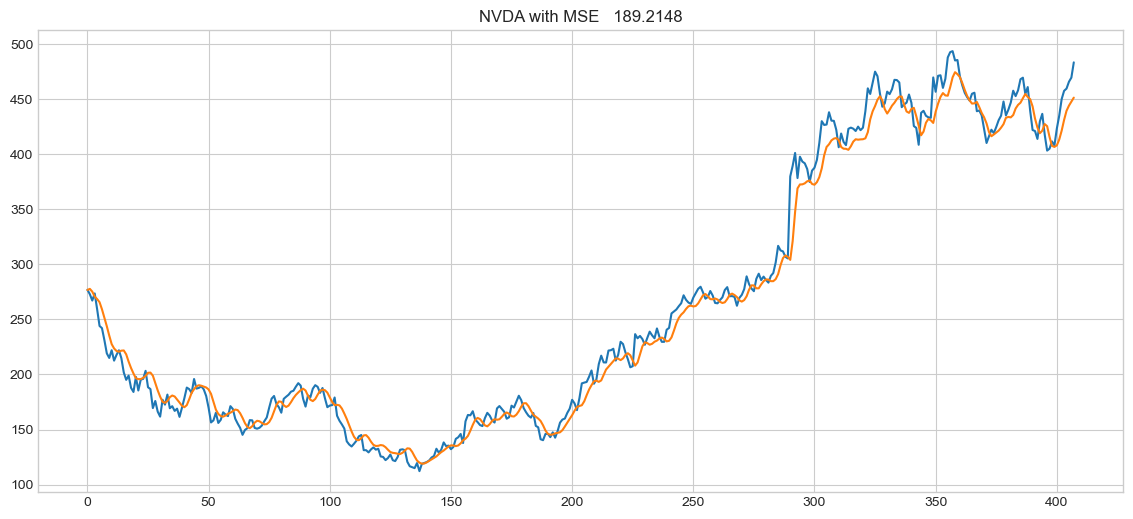

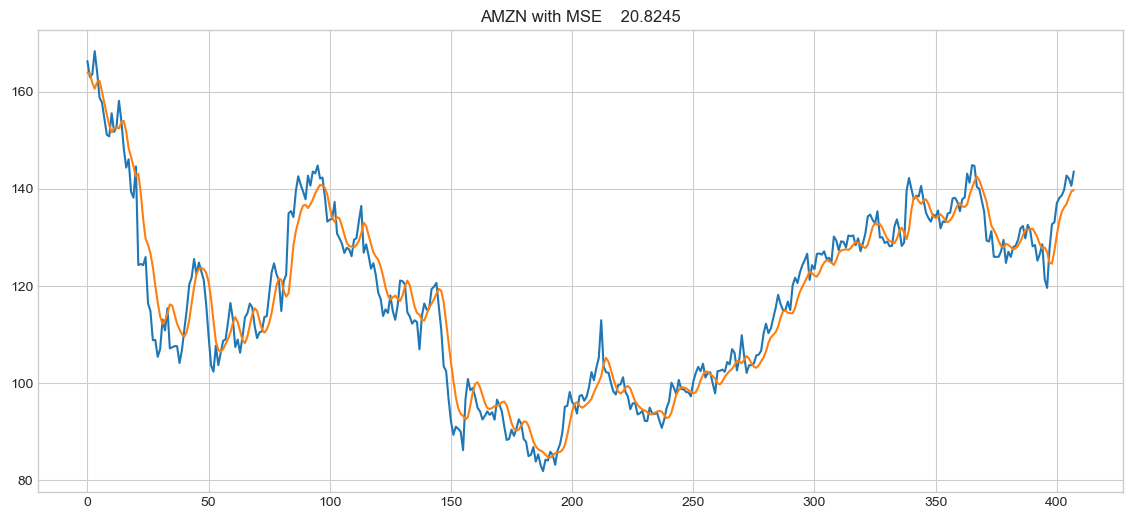

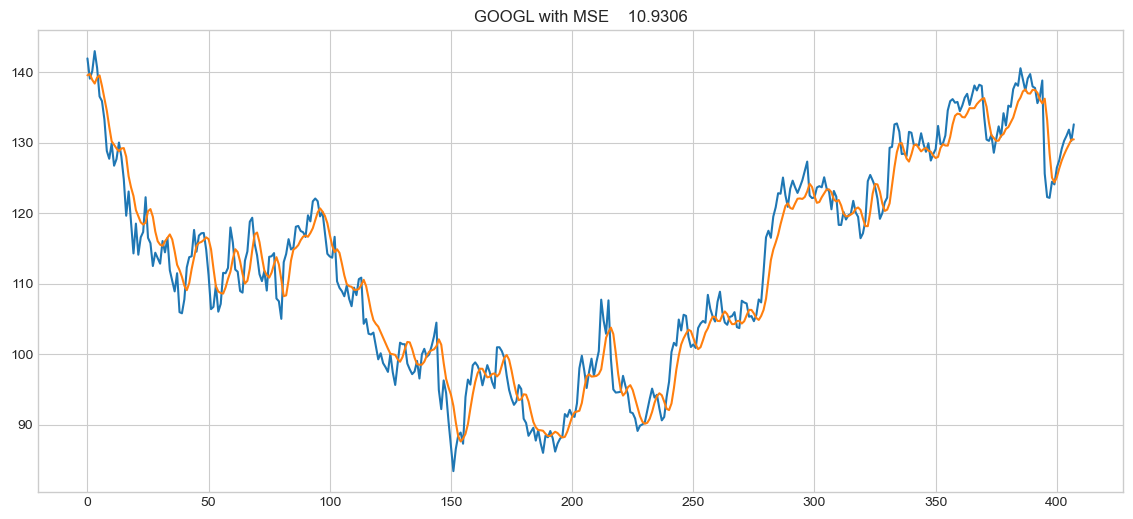

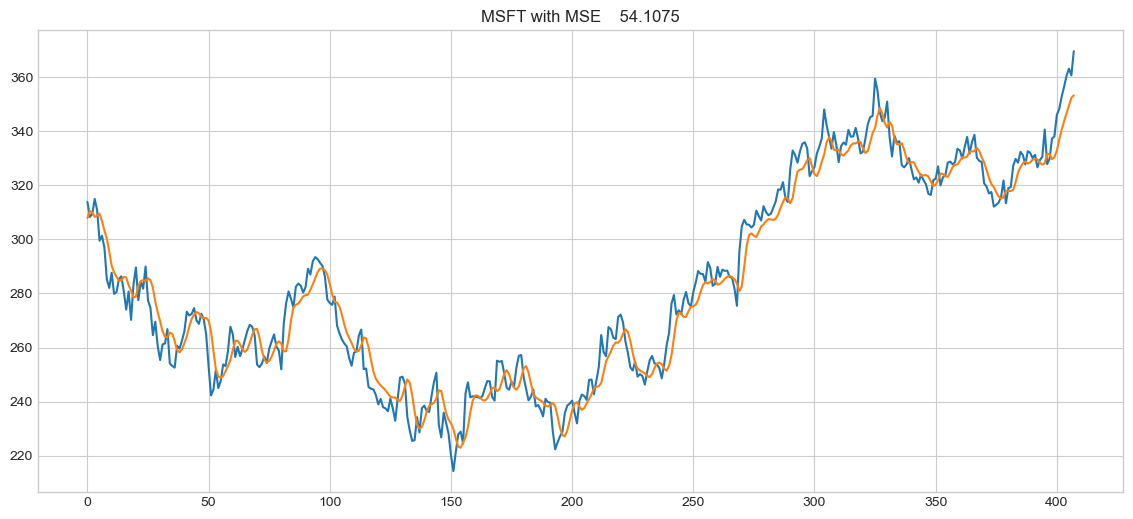

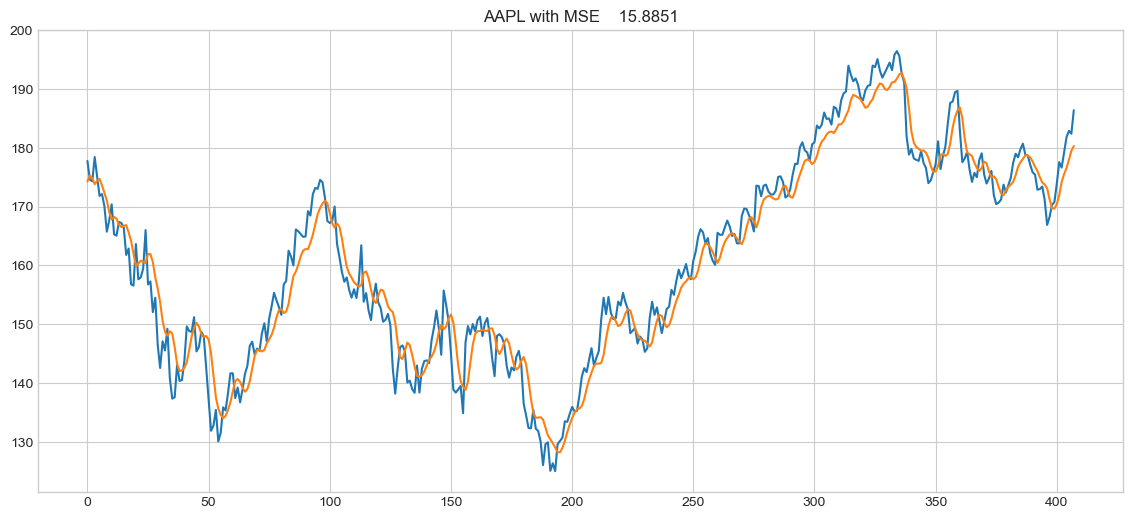

In [67]:
#We need to print the graph of loss count

pred_result = {}
for i in stockList:
    # Scale up to the orignial value
    y_true_before = testset[i]["y"].reshape(-1,1)
    y_true = scaler[i].inverse_transform(y_true_before)     # convert actual price into a column matrix of whatever the datatype is...
    y_pred_before = regressor.predict(testset[i]["X"])
    y_pred = scaler[i].inverse_transform(y_pred_before)   # predict 1 price based on each set of 60 datas and save it into a column matrix

    MSE = mean_squared_error(y_true, y_pred)
    pred_result[i] = {}
    pred_result[i]["True"] = y_true   # Blue is actual
    pred_result[i]["Pred"] = y_pred   # Yellow is predicted

    # Add Legend 
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MSE {:10.4f}".format(i,MSE))
    plt.plot(y_true)
    plt.plot(y_pred)